In [22]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib

from sklearn.metrics import confusion_matrix

from keras.datasets import fashion_mnist

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [23]:
drive.mount("/content/gdrive")
df_ori = pd.read_csv('/content/gdrive/MyDrive/datosTratados_last.csv')
df_ori = df_ori.iloc[: , 1:] #eliminar primera columna
df=df_ori.copy()
#mezclar las filas
df = df.sample(n = len(df), random_state = 42)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Definimos las columnas que son numericas y los que son categoricas, sin añadir la columna a predecir

In [24]:
columnas_numericas=['A1Cresult', 'age', 'dosis_changes', 'dosis_plus_minus', 'num_lab_procedures', 'num_medications', 'num_medicines', 'num_procedures', 'number_diagnoses', 'number_emergency', 'number_hospital', 'number_inpatient', 'number_outpatient', 'time_in_hospital', 'total_procedures']
columnas_categoricas=df[df.columns.difference(columnas_numericas)].columns.tolist()
columnas_categoricas.remove("readmitted")

# separar datos en datos de entrenamiento validacion y test

In [25]:
X=df.drop(['readmitted'], axis=1)
Y=df["readmitted"]

In [26]:
 X_train, X_test, y_train,  y_test = train_test_split(X,Y,test_size=0.20,random_state=30)

Para la red neuronal tambien creamos datos de validación

In [42]:
X_train_rn,X_val, y_train_rn, y_val= train_test_split(X_train,y_train,test_size=0.20,random_state=2)

#Funciones evaluacion y red neuronal

funcion para mezclar

In [27]:
def mezclar(array1,array2):
 a=pd.DataFrame(X_train_downover)
 a["readmitted"] = y_train_downover.tolist()
 a.sample(n = len(a), random_state = 30)
 X_sample=a.drop(["readmitted"], axis=1)
 Y_sample=a["readmitted"]
 return X_sample,Y_sample

##RESULTADOS

Visualizar acuraccy/loss del entrenamiento

In [28]:
## Visualizar acuraccy/loss del entrenamiento

def plot_acc(history, title="Model Accuracy"):
  """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


def plot_loss(history, title="Model Loss"):
  """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

def plot_compare_losses(history1, history2, name1="Red 1",
name2="Red 2", title="Graph title"):
  """Compara losses de dos entrenamientos con nombres name1 y name2"""
  plt.plot(history1.history['loss'], color="green")
  plt.plot(history1.history['val_loss'], 'r--', color="green")
  plt.plot(history2.history['loss'], color="blue")
  plt.plot(history2.history['val_loss'], 'r--', color="blue")
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train ' + name1, 'Val ' + name1,
  'Train ' + name2, 'Val ' + name2],
  loc='upper right')
  plt.show()

def plot_compare_accs(history1, history2, name1="Red 1",
  name2="Red 2", title="Graph title"):
  """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
  plt.plot(history1.history['accuracy'], color="green")
  plt.plot(history1.history['val_accuracy'], 'r--', color="green")
  plt.plot(history2.history['accuracy'], color="blue")
  plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train ' + name1, 'Val ' + name1,
  'Train ' + name2, 'Val ' + name2],
  loc='lower right')
  plt.show()

imprimir numero de clases

In [29]:
import collections
def printNumClasses(sampledClass,class_predict):
  print("Numero de clases antes de muestrear",class_predict.value_counts())
  print("Numero de clases despues de muestrear", collections.Counter(sampledClass))
  print()

Visualizar matriz de confusion y metricas

In [30]:
import itertools
def plot_confusion_matrix(y_test,  y_pred, threshold, classes=["NO","<30"],
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm= confusion_matrix(y_test,(y_pred > threshold))



    plt.figure(figsize=(6, 6), dpi=80)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
from sklearn import metrics

def calc_specificity(y_true, y_pred, threshold):
    # calculates specificity
    return sum((y_pred < threshold) & (y_true == 0)) /sum(y_true ==0)

def evaluarModelo(y_true, y_pred,threshold,title):
  metrics_list = []

  metrics_list.append(metrics.roc_auc_score(y_true, (y_pred > threshold)))
  metrics_list.append(metrics.accuracy_score(y_true, (y_pred > threshold)))
  metrics_list.append(metrics.precision_score(y_true, (y_pred > threshold)))
  metrics_list.append(metrics.recall_score(y_true, (y_pred > threshold)))

  cm1 = confusion_matrix(y_true,(y_pred > threshold))
  specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
  metrics_list.append(specificity1)

  metrics_list.append(metrics.f1_score(y_true, (y_pred > threshold)))

  """fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
  metrics_list.append(metrics.auc(fpr, tpr))

  """
    


  data = {title: metrics_list}
  df_metrics=pd.DataFrame.from_dict(data)
  df_metrics.index = ['AUC', 'exactitud', 'precision', 'Recall/sensibilidad','especifidad',"f1"]
  #rint(df_metrics)
  return df_metrics

##RED NEURONAL

In [32]:
def obtenerModelo(x_len,dropout):

  #crear modelo
  model = Sequential()
  model.add(Dense(1000, kernel_initializer='uniform',input_dim=x_len,activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(600, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(200, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(60, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(1, activation='sigmoid'))

  #compilar modelo
  model.compile(loss='binary_crossentropy', optimizer='adam', 
                metrics=['accuracy',keras.metrics.Precision()])

  return model

In [33]:
def obtenerModelo2(x_len,dropout):

  #crear modelo
  model = Sequential()
  model.add(Dense(3000, kernel_initializer='uniform',input_dim=x_len, 
                  activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3000, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1000, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  #compilar modelo
  model.compile(loss='binary_crossentropy', optimizer='adam', 
                metrics=['accuracy',keras.metrics.Precision()])

  return model

In [34]:
def ejecutarRedNeuronal(X_train, y_train, X_val, y_val,X_test=X_test,batch_size=100,epoch=10,modelo_num=True,threshold=0.50,graphic=True, title="",dropout=0.4):
  #obtener modelo
  if(modelo_num):
    modelo=obtenerModelo(X_train.shape[1],dropout)
  else:
    modelo=obtenerModelo2(X_train.shape[1])
  print("entrenar modelo")
  #entrenar modelo
  history=modelo.fit(X_train, y_train, batch_size=batch_size,epochs=epoch,validation_data=(X_val, y_val))#,callbacks=[es])

  #predecir clase
  y_pred = modelo.predict(X_test)
  y_pred_train= modelo.predict(X_train)

  return y_pred,y_pred_train, modelo,history

# A. Modelos sin seleccion de caracteristicas

## 1. Modelos sin balanceo de datos

### 1.1 Arboles de decision

Creación y entrenamiento del modelo


In [35]:
from sklearn.tree import DecisionTreeClassifier

arbol_sb = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_sb.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [55]:
arbol_sb_train_preds = arbol_sb.predict_proba(X_train)[:,1]
arbol_sb_test_preds = arbol_sb.predict_proba(X_test)[:,1]

threshold=0.1

print("resultados del entrenamiento del Random Forest sin balancear los datos:")
arbol_train_sb=evaluarModelo(y_train,arbol_sb_train_preds, threshold, "arbol_train_sb")
arbol_test_sb=evaluarModelo(y_test,arbol_sb_test_preds, threshold, "arbol_Test_sb")
arbol_train_sb.join(arbol_test_sb)

resultados del entrenamiento del Random Forest sin balancear los datos:


,arbol_train_sb,arbol_Test_sb
AUC,0.659208,0.591237
exactitud,0.664771,0.638482
precision,0.199925,0.166803
Recall/sensibilidad,0.652015,0.529718
especifidad,0.652015,0.529718
f1,0.306017,0.253714


Confusion matrix, without normalization
[[11465  6099]
 [ 1084  1221]]


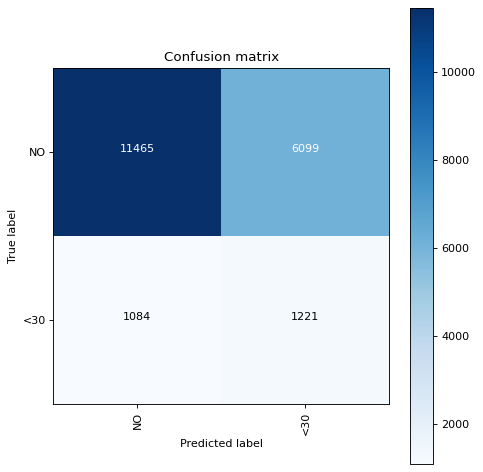

In [56]:
plot_confusion_matrix(y_test,arbol_sb_test_preds,threshold)


### 1.2Random forest

Creación y entrenamiento del modelo


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
rf_sb =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=30)
rf_sb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=30, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Evaluar model: metricas y matriz de confusion

In [61]:
rf_sb_train_preds = rf_sb.predict_proba(X_train)[:,1]
rf_sb_test_preds = rf_sb.predict_proba(X_test)[:,1]

threshold=0.1

print("resultados del entrenamiento del arbol de decision sin balancear los datos")
rf_train_sb=evaluarModelo(y_train,rf_sb_train_preds, threshold, "RF_train_sb")
rf_test_sb=evaluarModelo(y_test,rf_sb_test_preds, threshold, "RF_Test_sb")
rf_train_sb.join(rf_test_sb)

resultados del entrenamiento del arbol de decision sin balancear los datos


,RF_train_sb,RF_Test_sb
AUC,0.647805,0.604154
exactitud,0.612276,0.595350
precision,0.182189,0.165520
Recall/sensibilidad,0.693751,0.615618
especifidad,0.693751,0.615618
f1,0.288590,0.260894


Confusion matrix, without normalization
[[10410  7154]
 [  886  1419]]


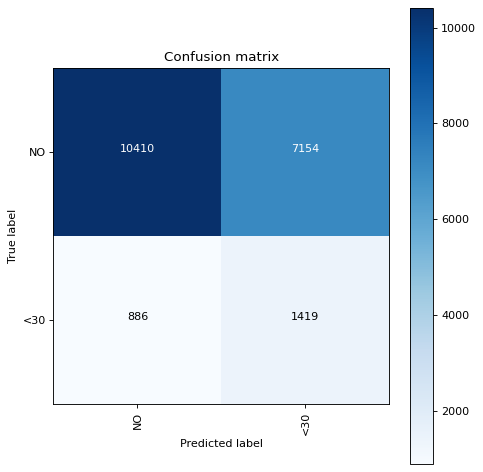

In [62]:
plot_confusion_matrix(y_test,rf_sb_test_preds,threshold)

### 1.3 Red neuronal


Creación y entrenamiento del modelo


In [63]:
rn_sb_pred,rn_sb_pred_train,modelo_sb,history_sb=ejecutarRedNeuronal(X_train_rn, y_train_rn, X_val, y_val,batch_size=100,epoch=3,title="Rd_sin_balancear")

entrenar modelo
Epoch 1/3
636/636 [==============================] - 6s 7ms/step - loss: 0.3628 - accuracy: 0.8853 - precision_1: 0.1447 - val_loss: 0.3376 - val_accuracy: 0.8886 - val_precision_1: 0.0000e+00
Epoch 2/3
636/636 [==============================] - 4s 7ms/step - loss: 0.3516 - accuracy: 0.8861 - precision_1: 0.0000e+00 - val_loss: 0.3354 - val_accuracy: 0.8886 - val_precision_1: 0.0000e+00
Epoch 3/3
636/636 [==============================] - 4s 7ms/step - loss: 0.3482 - accuracy: 0.8861 - precision_1: 0.0000e+00 - val_loss: 0.3367 - val_accuracy: 0.8886 - val_precision_1: 0.0000e+00


Evaluar model: metricas y matriz de confusion

In [70]:
threshold=0.15

print("resultados del entrenamiento de la red neuronal sin balancear los datos:")
rn_train_sb=evaluarModelo(y_train_rn,rn_sb_pred_train, threshold, "RN_train_sb")
rn_test_sb=evaluarModelo(y_test,rn_sb_pred, threshold, "RN_Test_sb")
rn_train_sb.join(rn_test_sb)

resultados del entrenamiento de la red neuronal sin balancear los datos:


,RN_train_sb,RN_Test_sb
AUC,0.629256,0.615284
exactitud,0.634077,0.629020
precision,0.180069,0.176087
Recall/sensibilidad,0.623014,0.597397
especifidad,0.623014,0.597397
f1,0.279387,0.272000


Confusion matrix, without normalization
[[11121  6443]
 [  928  1377]]


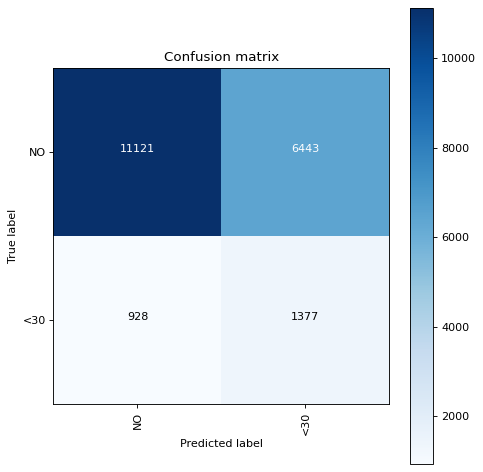

In [71]:
plot_confusion_matrix(y_test,rn_sb_pred,threshold)

### 4.Comparación de los modelos

In [72]:
df_result=arbol_train_sb
all_df=[ rf_train_sb, rn_train_sb, arbol_test_sb, rf_test_sb, rn_test_sb]
for next_df in all_df:
 df_result=df_result.join(next_df) 


In [73]:
df_result

,arbol_train_sb,RF_train_sb,RN_train_sb,arbol_Test_sb,RF_Test_sb,RN_Test_sb
AUC,0.659208,0.647805,0.629256,0.591237,0.604154,0.615284
exactitud,0.664771,0.612276,0.634077,0.638482,0.595350,0.629020
precision,0.199925,0.182189,0.180069,0.166803,0.165520,0.176087
Recall/sensibilidad,0.652015,0.693751,0.623014,0.529718,0.615618,0.597397
especifidad,0.652015,0.693751,0.623014,0.529718,0.615618,0.597397
f1,0.306017,0.288590,0.279387,0.253714,0.260894,0.272000


## 2. Modelos aplicando SMOTE

In [74]:
over = SMOTE(random_state = 30)
X_train_smote, y_train_smote = over.fit_resample(X_train, y_train)
X_train_smote_rn, y_train_smote_rn = over.fit_resample(X_train_rn, y_train_rn)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 2.1 Arboles de decision

Creación y entrenamiento del modelo


In [77]:
from sklearn.tree import DecisionTreeClassifier

arbol_smote = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [91]:
arbol_smote_train_preds = arbol_smote.predict_proba(X_train_smote)[:,1]
arbol_smote_test_preds = arbol_smote.predict_proba(X_test)[:,1]

threshold=0.13

print("resultados del entrenamiento del Random Forest sin balancear los datos:")
arbol_train_smote=evaluarModelo(y_train_smote,arbol_smote_train_preds, threshold, "arbol_train_smote")
arbol_test_smote=evaluarModelo(y_test,arbol_smote_test_preds, threshold, "arbol_Test_smote")
arbol_train_smote.join(arbol_test_smote)

resultados del entrenamiento del Random Forest sin balancear los datos:


,arbol_train_smote,arbol_Test_smote
AUC,0.764543,0.585036
exactitud,0.764543,0.574211
precision,0.693059,0.154873
Recall/sensibilidad,0.949677,0.599132
especifidad,0.949677,0.599132
f1,0.801324,0.246124


Confusion matrix, without normalization
[[10028  7536]
 [  924  1381]]


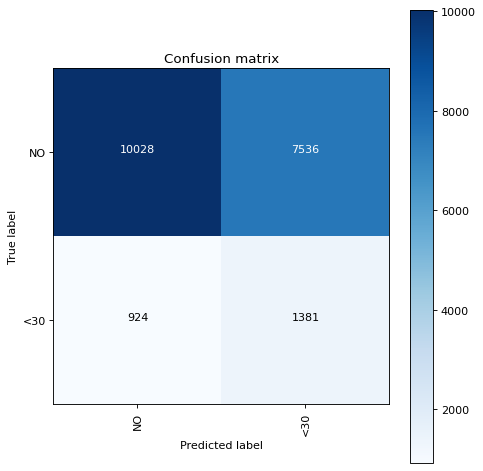

In [92]:
plot_confusion_matrix(y_test,arbol_smote_test_preds,threshold)


### 2.2Random forest

Creación y entrenamiento del modelo


In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_smote =RandomForestClassifier(n_estimators=100, 
     max_depth=13, random_state=30)
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Evaluar model: metricas y matriz de confusion

In [109]:
rf_smote_train_preds = rf_smote.predict_proba(X_train_smote)[:,1]
rf_smote_test_preds = rf_smote.predict_proba(X_test)[:,1]

threshold=0.27

print("resultados del entrenamiento del arbol de decision sin balancear los datos")
rf_train_smote=evaluarModelo(y_train_smote,rf_smote_train_preds, threshold, "RF_train_smote")
rf_test_smote=evaluarModelo(y_test,rf_smote_test_preds, threshold, "RF_Test_smote")
rf_train_smote.join(rf_test_smote)

resultados del entrenamiento del arbol de decision sin balancear los datos


,RF_train_smote,RF_Test_smote
AUC,0.802959,0.609427
exactitud,0.802959,0.604006
precision,0.727077,0.169066
Recall/sensibilidad,0.970042,0.616486
especifidad,0.970042,0.616486
f1,0.831168,0.265359


Confusion matrix, without normalization
[[10580  6984]
 [  884  1421]]


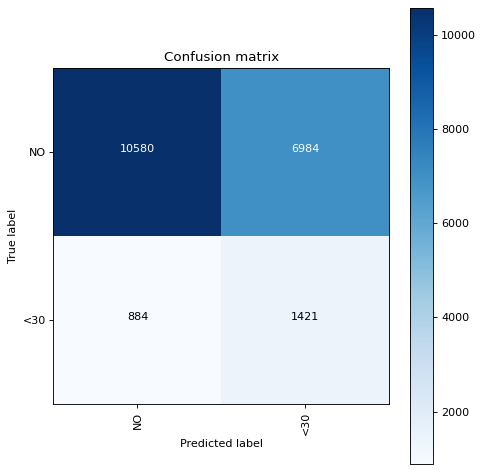

In [110]:
plot_confusion_matrix(y_test,rf_smote_test_preds,threshold)

### 2.3 Red neuronal


Creación y entrenamiento del modelo


In [127]:
rn_smote_pred,rn_smote_pred_train,modelo_smote,history_smote=ejecutarRedNeuronal(X_train_smote_rn, y_train_smote_rn, X_val, y_val,batch_size=100,epoch=4,title="Rd_sin_balancear")

entrenar modelo
Epoch 1/4
1127/1127 [==============================] - 9s 7ms/step - loss: 0.6154 - accuracy: 0.6610 - precision_4: 0.6518 - val_loss: 0.5987 - val_accuracy: 0.6927 - val_precision_4: 0.1757
Epoch 2/4
1127/1127 [==============================] - 7s 6ms/step - loss: 0.5139 - accuracy: 0.7491 - precision_4: 0.7476 - val_loss: 0.5613 - val_accuracy: 0.7285 - val_precision_4: 0.1707
Epoch 3/4
1127/1127 [==============================] - 7s 6ms/step - loss: 0.4495 - accuracy: 0.7910 - precision_4: 0.7930 - val_loss: 0.4875 - val_accuracy: 0.7903 - val_precision_4: 0.1883
Epoch 4/4
1127/1127 [==============================] - 7s 7ms/step - loss: 0.4089 - accuracy: 0.8149 - precision_4: 0.8198 - val_loss: 0.4673 - val_accuracy: 0.8039 - val_precision_4: 0.1866


visualizar conportamiento durante el entrenamiento

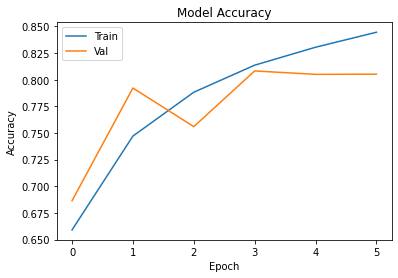

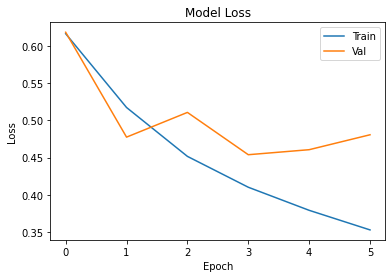

In [120]:
#visualizar accuracy y loss en el entrenamiento
plot_acc(history_smote)
plot_loss(history_smote)

Evaluar model: metricas y matriz de confusion

In [141]:
threshold=0.22

print("resultados del entrenamiento de la red neuronal sin balancear los datos:")
rn_train_smote=evaluarModelo(y_train_smote_rn,rn_smote_pred_train, threshold, "RN_train_smote")
rn_test_smote=evaluarModelo(y_test,rn_smote_pred, threshold, "RN_Test_smote")
rn_train_smote.join(rn_test_smote)

resultados del entrenamiento de la red neuronal sin balancear los datos:


,RN_train_smote,RN_Test_smote
AUC,0.778541,0.569322
exactitud,0.778541,0.546429
precision,0.698736,0.145844
Recall/sensibilidad,0.979322,0.599132
especifidad,0.979322,0.599132
f1,0.815571,0.234585


Confusion matrix, without normalization
[[9140 8424]
 [ 885 1420]]


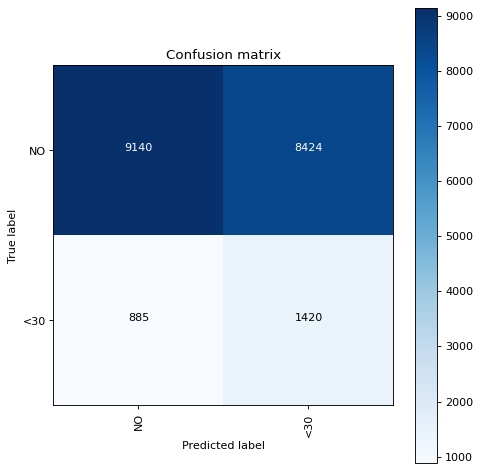

In [140]:
plot_confusion_matrix(y_test,rn_smote_pred,threshold)

### 2.4.Comparación de los modelos

In [142]:
df_result_smote=arbol_train_smote
all_df=[ rf_train_smote, rn_train_smote, arbol_test_smote, rf_test_smote, rn_test_smote]

for next_df in all_df:
 df_result_smote=df_result_smote.join(next_df) 

df_result_smote

,arbol_train_smote,RF_train_smote,RN_train_smote,arbol_Test_smote,RF_Test_smote,RN_Test_smote
AUC,0.764543,0.802959,0.778541,0.585036,0.609427,0.569322
exactitud,0.764543,0.802959,0.778541,0.574211,0.604006,0.546429
precision,0.693059,0.727077,0.698736,0.154873,0.169066,0.145844
Recall/sensibilidad,0.949677,0.970042,0.979322,0.599132,0.616486,0.599132
especifidad,0.949677,0.970042,0.979322,0.599132,0.616486,0.599132
f1,0.801324,0.831168,0.815571,0.246124,0.265359,0.234585


## 3. Aplicando down sampling

In [143]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=30)
X_train_down, y_train_down = under.fit_resample(X_train, y_train)
X_train_down_rn, y_train_down_rn = under.fit_resample(X_train_rn, y_train_rn)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
printNumClasses(y_train_down,y_train)
printNumClasses(y_train_down_rn,y_train_rn)

Numero de clases antes de muestrear 0.0    70465
1.0     9009
Name: readmitted, dtype: int64
Numero de clases despues de muestrear Counter({0.0: 9009, 1.0: 9009})

Numero de clases antes de muestrear 0.0    56340
1.0     7239
Name: readmitted, dtype: int64
Numero de clases despues de muestrear Counter({0.0: 7239, 1.0: 7239})



### 3.1 Arboles de decision

Creación y entrenamiento del modelo


In [144]:
from sklearn.tree import DecisionTreeClassifier

arbol_down = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_down.fit(X_train_down, y_train_down)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [169]:
arbol_down_train_preds = arbol_down.predict_proba(X_train_down)[:,1]
arbol_down_test_preds = arbol_down.predict_proba(X_test)[:,1]

threshold=0.49

print("resultados del entrenamiento del Random Forest con downsampling:")
arbol_train_down=evaluarModelo(y_train_down,arbol_down_train_preds, threshold, "arbol_train_down")
arbol_test_down=evaluarModelo(y_test,arbol_down_test_preds, threshold, "arbol_Test_down")
arbol_train_down.join(arbol_test_down)

resultados del entrenamiento del Random Forest con downsampling:


,arbol_train_down,arbol_Test_down
AUC,0.697580,0.587018
exactitud,0.697580,0.634355
precision,0.721558,0.164048
Recall/sensibilidad,0.643468,0.525380
especifidad,0.643468,0.525380
f1,0.680279,0.250026


Confusion matrix, without normalization
[[11393  6171]
 [ 1094  1211]]


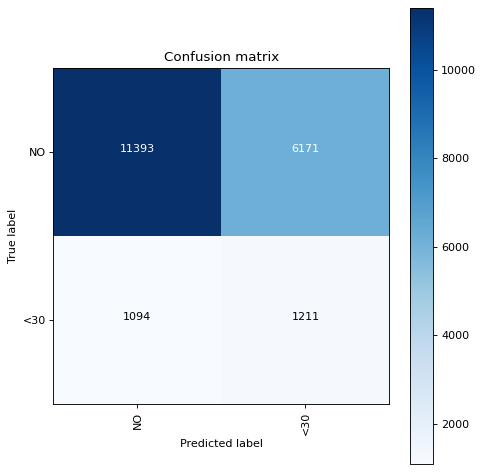

In [170]:
plot_confusion_matrix(y_test,arbol_down_test_preds,threshold)


###3.2Random forest

Creación y entrenamiento del modelo


In [171]:
from sklearn.ensemble import RandomForestClassifier
rf_down =RandomForestClassifier(n_estimators=100,
     max_depth=13, random_state=30)
rf_down.fit(X_train_down, y_train_down)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Evaluar model: metricas y matriz de confusion

In [182]:
rf_down_train_preds = rf_down.predict_proba(X_train_down)[:,1]
rf_down_test_preds = rf_down.predict_proba(X_test)[:,1]

threshold=0.48

print("resultados del entrenamiento del arbol de decision con downsampling")
rf_train_down=evaluarModelo(y_train_down,rf_down_train_preds, threshold, "RF_train_down")
rf_test_down=evaluarModelo(y_test,rf_down_test_preds, threshold, "RF_Test_down")
rf_train_down.join(rf_test_down)

resultados del entrenamiento del arbol de decision con downsampling


,RF_train_down,RF_Test_down
AUC,0.814574,0.620846
exactitud,0.814574,0.591877
precision,0.809524,0.171719
Recall/sensibilidad,0.822733,0.658568
especifidad,0.822733,0.658568
f1,0.816075,0.272409


Confusion matrix, without normalization
[[10242  7322]
 [  787  1518]]


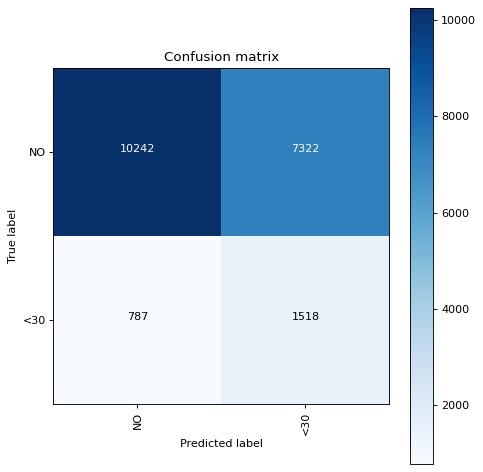

In [183]:
plot_confusion_matrix(y_test,rf_down_test_preds,threshold)

### 3.3 Red neuronal


Creación y entrenamiento del modelo


In [184]:
rn_down_pred,rn_down_pred_train,modelo_down,history_down=ejecutarRedNeuronal(X_train_down_rn, y_train_down_rn, X_val, y_val,batch_size=10,epoch=4,title="Rd_sin_balancear")

entrenar modelo
Epoch 1/4
1448/1448 [==============================] - 14s 9ms/step - loss: 0.6914 - accuracy: 0.5461 - precision_5: 0.5483 - val_loss: 0.6823 - val_accuracy: 0.5895 - val_precision_5: 0.1522
Epoch 2/4
1448/1448 [==============================] - 12s 8ms/step - loss: 0.6763 - accuracy: 0.5816 - precision_5: 0.5881 - val_loss: 0.6542 - val_accuracy: 0.6444 - val_precision_5: 0.1665
Epoch 3/4
1448/1448 [==============================] - 12s 9ms/step - loss: 0.6693 - accuracy: 0.5957 - precision_5: 0.6033 - val_loss: 0.5727 - val_accuracy: 0.7309 - val_precision_5: 0.1821
Epoch 4/4
1448/1448 [==============================] - 12s 9ms/step - loss: 0.6655 - accuracy: 0.6031 - precision_5: 0.6075 - val_loss: 0.6913 - val_accuracy: 0.5206 - val_precision_5: 0.1490


visualizar conportamiento durante el entrenamiento

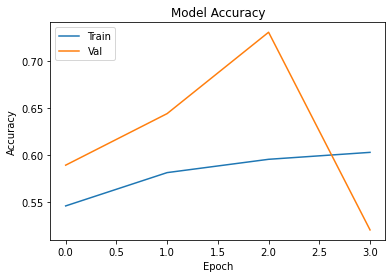

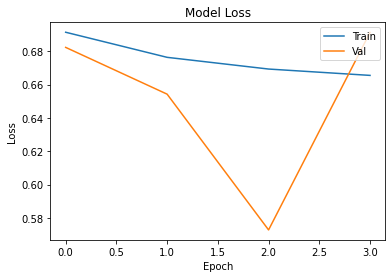

In [185]:
#visualizar accuracy y loss en el entrenamiento
plot_acc(history_down)
plot_loss(history_down)

Evaluar model: metricas y matriz de confusion

In [200]:
threshold=0.52

print("resultados del entrenamiento de la red neuronal sin balancear los datos:")
rn_train_down=evaluarModelo(y_train_down_rn,rn_down_pred_train, threshold, "RN_train_down")
rn_test_down=evaluarModelo(y_test,rn_down_pred, threshold, "RN_Test_down")
rn_train_down.join(rn_test_down)

resultados del entrenamiento de la red neuronal sin balancear los datos:


,RN_train_down,RN_Test_down
AUC,0.627987,0.612957
exactitud,0.627987,0.643565
precision,0.638926,0.178056
Recall/sensibilidad,0.588617,0.573102
especifidad,0.588617,0.573102
f1,0.612741,0.271699


Confusion matrix, without normalization
[[11466  6098]
 [  984  1321]]


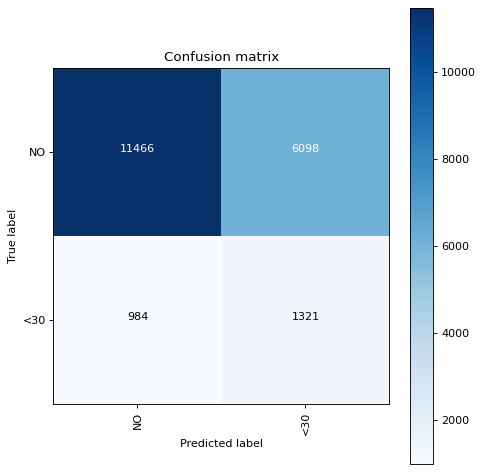

In [201]:
plot_confusion_matrix(y_test,rn_down_pred,threshold)

### 3.4 Comparación de los modelos

In [285]:
df_result_down=arbol_train_down
all_df=[ rf_train_down, rn_train_down, arbol_test_down, rf_test_down, rn_test_down]

for next_df in all_df:
 df_result_down=df_result_down.join(next_df) 

df_result_down

,arbol_train_down,RF_train_down,RN_train_down,arbol_Test_down,RF_Test_down,RN_Test_down
AUC,0.697580,0.814574,0.627987,0.587018,0.620846,0.612957
exactitud,0.697580,0.814574,0.627987,0.634355,0.591877,0.643565
precision,0.721558,0.809524,0.638926,0.164048,0.171719,0.178056
Recall/sensibilidad,0.643468,0.822733,0.588617,0.525380,0.658568,0.573102
especifidad,0.643468,0.822733,0.588617,0.525380,0.658568,0.573102
f1,0.680279,0.816075,0.612741,0.250026,0.272409,0.271699


## 4.Combinacion de SMOTE y downsampling

In [286]:
y_train.value_counts()

0    70465
1     9009
Name: readmitted, dtype: int64

In [220]:
over_2 = SMOTE(random_state = 30,sampling_strategy=0.4)
under_2 = RandomUnderSampler(random_state=30)

X_train_downover, y_train_downover = over_2.fit_resample(X_train, y_train)
X_train_downover, y_train_downover = under_2.fit_resample(X_train_downover, y_train_downover)


X_train_downover_rn, y_train_downover_rn = over_2.fit_resample(X_train_rn, y_train_rn)
X_train_downover_rn, y_train_downover_rn = under_2.fit_resample(X_train_downover_rn, y_train_downover_rn)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

### 4.1 Arboles de decision

Creación y entrenamiento del modelo


In [221]:
from sklearn.tree import DecisionTreeClassifier

arbol_downover = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_downover.fit(X_train_downover, y_train_downover)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [227]:
arbol_downover_train_preds = arbol_downover.predict_proba(X_train_downover)[:,1]
arbol_downover_test_preds = arbol_downover.predict_proba(X_test)[:,1]

threshold_tree_downover=0.26

print("resultados del entrenamiento del Random Forest con downoversampling:")
arbol_train_downover=evaluarModelo(y_train_downover,arbol_downover_train_preds, threshold_tree_downover, "arbol_train_downover")
arbol_test_downover=evaluarModelo(y_test,arbol_downover_test_preds, threshold_tree_downover, "arbol_Test_downover")
arbol_train_downover.join(arbol_test_downover)

resultados del entrenamiento del Random Forest con downoversampling:


,arbol_train_downover,arbol_Test_downover
AUC,0.740793,0.584937
exactitud,0.740793,0.565705
precision,0.684741,0.153897
Recall/sensibilidad,0.892500,0.609978
especifidad,0.892500,0.609978
f1,0.774937,0.245783


Confusion matrix, without normalization
[[9834 7730]
 [ 899 1406]]


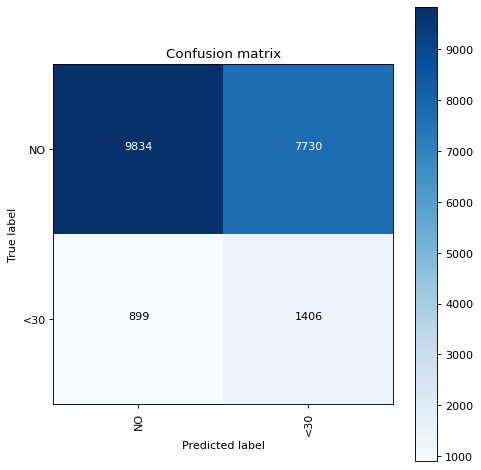

In [228]:
plot_confusion_matrix(y_test,arbol_downover_test_preds,threshold_tree_downover)

### 4.2Random forest

Creación y entrenamiento del modelo


In [229]:
from sklearn.ensemble import RandomForestClassifier
rf_downover =RandomForestClassifier(n_estimators=100, 
     max_depth=12, random_state=30)
rf_downover.fit(X_train_downover, y_train_downover)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Evaluar model: metricas y matriz de confusion

In [244]:
rf_downover_train_preds = rf_downover.predict_proba(X_train_downover)[:,1]
rf_downover_test_preds = rf_downover.predict_proba(X_test)[:,1]

threshold_rf_downover=0.35

print("resultados del entrenamiento del arbol de decision con downoversampling")
rf_train_downover=evaluarModelo(y_train_downover,rf_downover_train_preds, threshold_rf_downover, "RF_train_downover")
rf_test_downover=evaluarModelo(y_test,rf_downover_test_preds, threshold_rf_downover, "RF_Test_downover")
rf_train_downover.join(rf_test_downover)

resultados del entrenamiento del arbol de decision con downoversampling


,RF_train_downover,RF_Test_downover
AUC,0.783137,0.615325
exactitud,0.783137,0.601439
precision,0.723775,0.171080
Recall/sensibilidad,0.915774,0.633406
especifidad,0.915774,0.633406
f1,0.808533,0.269398


Confusion matrix, without normalization
[[10490  7074]
 [  845  1460]]


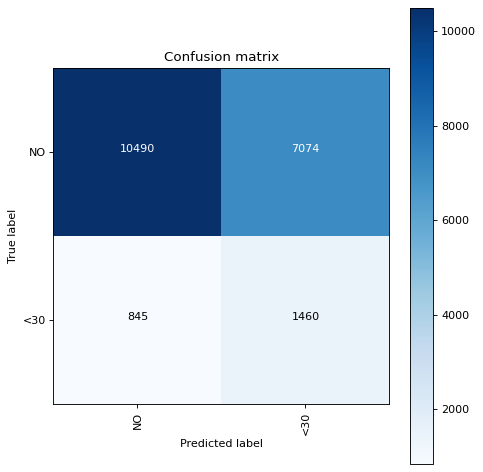

In [245]:
plot_confusion_matrix(y_test,rf_downover_test_preds,threshold_rf_downover)

### 4.3 Red neuronal


Creación y entrenamiento del modelo


In [232]:
rn_downover_pred,rn_downover_pred_train,modelo_downover,history_downover=ejecutarRedNeuronal(X_train_downover_rn, y_train_downover_rn, X_val, y_val,batch_size=100,epoch=5,title="Rd_sin_balancear")

entrenar modelo
Epoch 1/5
451/451 [==============================] - 5s 8ms/step - loss: 0.6639 - accuracy: 0.5973 - precision_6: 0.5927 - val_loss: 0.6224 - val_accuracy: 0.6488 - val_precision_6: 0.1654
Epoch 2/5
451/451 [==============================] - 3s 7ms/step - loss: 0.6247 - accuracy: 0.6583 - precision_6: 0.6492 - val_loss: 0.5682 - val_accuracy: 0.7100 - val_precision_6: 0.1819
Epoch 3/5
451/451 [==============================] - 3s 7ms/step - loss: 0.5963 - accuracy: 0.6872 - precision_6: 0.6819 - val_loss: 0.5741 - val_accuracy: 0.7078 - val_precision_6: 0.1800
Epoch 4/5
451/451 [==============================] - 3s 7ms/step - loss: 0.5659 - accuracy: 0.7120 - precision_6: 0.7140 - val_loss: 0.5186 - val_accuracy: 0.7669 - val_precision_6: 0.1918
Epoch 5/5
451/451 [==============================] - 3s 7ms/step - loss: 0.5360 - accuracy: 0.7334 - precision_6: 0.7365 - val_loss: 0.5101 - val_accuracy: 0.7634 - val_precision_6: 0.1884


visualizar conportamiento durante el entrenamiento

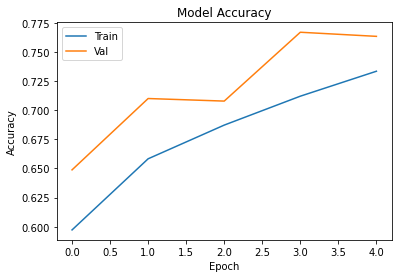

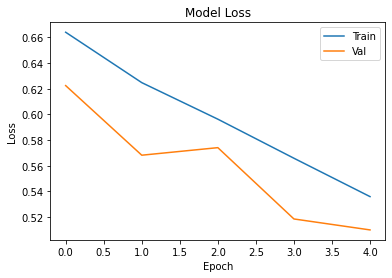

In [233]:
#visualizar accuracy y loss en el entrenamiento
plot_acc(history_downover)
plot_loss(history_downover)

Evaluar model: metricas y matriz de confusion

In [262]:
threshold_rn_downover=0.34

print("resultados del entrenamiento de la red neuronal sin balancear los datos:")
rn_train_downover=evaluarModelo(y_train_downover_rn,rn_downover_pred_train, threshold_rn_downover, "RN_train_downover")
rn_test_downover=evaluarModelo(y_test,rn_downover_pred, threshold_rn_downover, "RN_Test_downover")
rn_train_downover.join(rn_test_downover)

resultados del entrenamiento de la red neuronal sin balancear los datos:


,RN_train_downover,RN_Test_downover
AUC,0.754260,0.582207
exactitud,0.754260,0.568876
precision,0.698201,0.153130
Recall/sensibilidad,0.895678,0.599566
especifidad,0.895678,0.599566
f1,0.784706,0.243954


Confusion matrix, without normalization
[[9921 7643]
 [ 923 1382]]


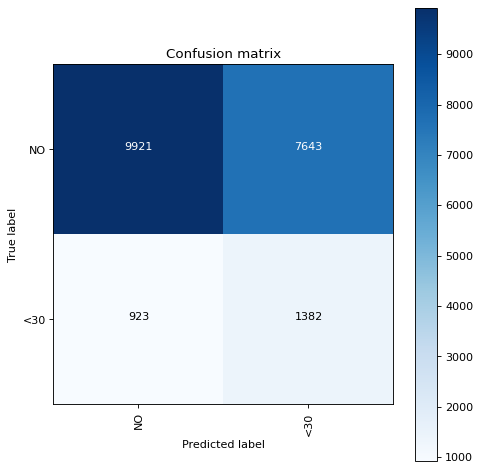

In [263]:
plot_confusion_matrix(y_test,rn_downover_pred,threshold_rn_downover)

### 4.4Conbinacion de todos los modelos

In [268]:
threshold=0.5
lists_of_lists=[rn_downover_pred*0.5/threshold_rn_downover,  rf_downover_test_preds*0.5/threshold_rf_downover, arbol_downover_test_preds*0.5/threshold_tree_downover]
result_2=np.array([sum(x)/len(lists_of_lists) for x in zip(*lists_of_lists)])
convinación_test_downover=evaluarModelo(y_test,result_2, threshold, "convinacion_Test")
convinación_test_downover


,convinacion_Test
AUC,0.606903
exactitud,0.587548
precision,0.165493
Recall/sensibilidad,0.632104
especifidad,0.632104
f1,0.262310


Confusion matrix, without normalization
[[10217  7347]
 [  848  1457]]


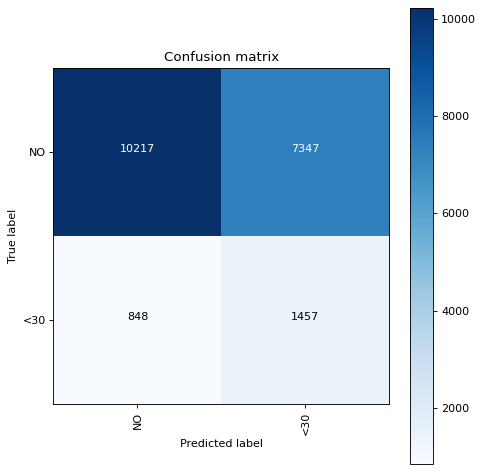

In [269]:
plot_confusion_matrix(y_test,result_2,threshold)

### 4.5Comparación de los modelos

In [281]:
df_result_downover=arbol_train_downover
all_df=[ rf_train_downover, rn_train_downover, arbol_test_downover, rf_test_downover, rn_test_downover,convinación_test_downover]

for next_df in all_df:
 df_result_downover=df_result_downover.join(next_df) 

df_result_downover

,arbol_train_downover,RF_train_downover,RN_train_downover,arbol_Test_downover,RF_Test_downover,RN_Test_downover,convinacion_Test
AUC,0.740793,0.783137,0.754260,0.584937,0.615325,0.582207,0.606903
exactitud,0.740793,0.783137,0.754260,0.565705,0.601439,0.568876,0.587548
precision,0.684741,0.723775,0.698201,0.153897,0.171080,0.153130,0.165493
Recall/sensibilidad,0.892500,0.915774,0.895678,0.609978,0.633406,0.599566,0.632104
especifidad,0.892500,0.915774,0.895678,0.609978,0.633406,0.599566,0.632104
f1,0.774937,0.808533,0.784706,0.245783,0.269398,0.243954,0.262310


# B. modelos con seleccion de caracteristicas con CHI-SQUARE + (SMOTE+Random Under Sampling)

In [289]:
from sklearn.feature_selection import chi2
prob=X[columnas_categoricas]

In [290]:
chi_scores = chi2(prob,Y)
p_values = pd.Series(chi_scores[1],index = prob.columns)
p_values.sort_values(ascending = False , inplace = True)


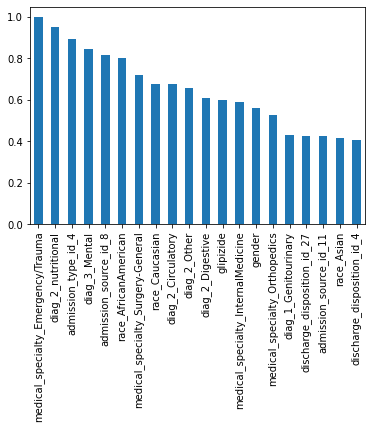

In [291]:
p_values[:20].plot.bar()


## Seleccion de 10 caracteristicas categoricas + todas las numericas

In [293]:
vals_10=p_values.index[-10:].tolist()
vals_10=vals_10+columnas_numericas


In [296]:
over_10 = SMOTE(random_state = 30,sampling_strategy=0.4)
under_10 = RandomUnderSampler(random_state=30)

X_train_select_10, y_train_select_10 = over_10.fit_resample(X_train[vals_10], y_train)
X_train_select_10, y_train_select_10 = under_10.fit_resample(X_train_select_10, y_train_select_10)


X_train_select_10_rn, y_train_select_10_rn = over_10.fit_resample(X_train_rn[vals_10], y_train_rn)
X_train_select_10_rn, y_train_select_10_rn = under_10.fit_resample(X_train_select_10_rn, y_train_select_10_rn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

### 1.1 Arboles de decision

Creación y entrenamiento del modelo


In [297]:
from sklearn.tree import DecisionTreeClassifier

arbol_select_10 = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_select_10.fit(X_train_select_10, y_train_select_10)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [308]:
arbol_select_10_train_preds = arbol_select_10.predict_proba(X_train_select_10)[:,1]
arbol_select_10_test_preds = arbol_select_10.predict_proba(X_test[vals_10])[:,1]

threshold_tree_select_10=0.31

print("resultados del entrenamiento del Random Forest con selectsampling:")
arbol_train_select_10=evaluarModelo(y_train_select_10,arbol_select_10_train_preds, threshold_tree_select_10, "arbol_train_10")
arbol_test_select_10=evaluarModelo(y_test,arbol_select_10_test_preds, threshold_tree_select_10, "arbol_Test_10")
arbol_train_select_10.join(arbol_test_select_10)

resultados del entrenamiento del Random Forest con selectsampling:


,arbol_train_10,arbol_Test_10
AUC,0.727134,0.582022
exactitud,0.727134,0.560219
precision,0.674660,0.152157
Recall/sensibilidad,0.877350,0.610412
especifidad,0.877350,0.610412
f1,0.762770,0.243594


Confusion matrix, without normalization
[[9724 7840]
 [ 898 1407]]


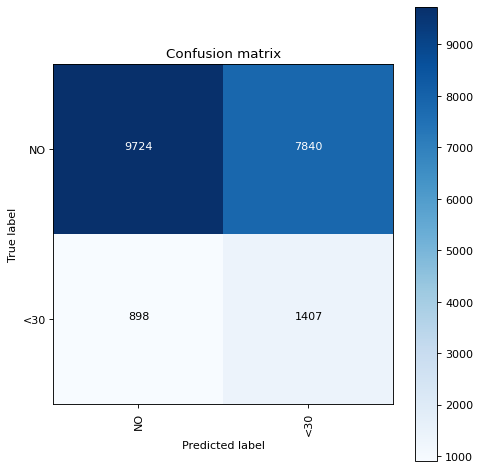

In [309]:
plot_confusion_matrix(y_test,arbol_select_10_test_preds,threshold_tree_select_10)

### 1.2Random forest

Creación y entrenamiento del modelo


In [310]:
from sklearn.ensemble import RandomForestClassifier
rf_select_10 =RandomForestClassifier(n_estimators=100,
     max_depth=10, random_state=30)
rf_select_10.fit(X_train_select_10, y_train_select_10)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Evaluar model: metricas y matriz de confusion

In [320]:
rf_select_10_train_preds = rf_select_10.predict_proba(X_train_select_10)[:,1]
rf_select_10_test_preds = rf_select_10.predict_proba(X_test[vals_10])[:,1]

threshold_rf_select_10=0.35

print("resultados del entrenamiento del arbol de decision con select with 20 features")
rf_train_select_10=evaluarModelo(y_train_select_10,rf_select_10_train_preds, threshold_rf_select_10, "RF_train_10")
rf_test_select_10=evaluarModelo(y_test,rf_select_10_test_preds, threshold_rf_select_10, "RF_Test_10")
rf_train_select_10.join(rf_test_select_10)

resultados del entrenamiento del arbol de decision con select with 20 features


,RF_train_10,RF_Test_10
AUC,0.751064,0.618191
exactitud,0.751064,0.601842
precision,0.698127,0.172317
Recall/sensibilidad,0.884659,0.639479
especifidad,0.884659,0.639479
f1,0.780402,0.271480


Confusion matrix, without normalization
[[10484  7080]
 [  831  1474]]


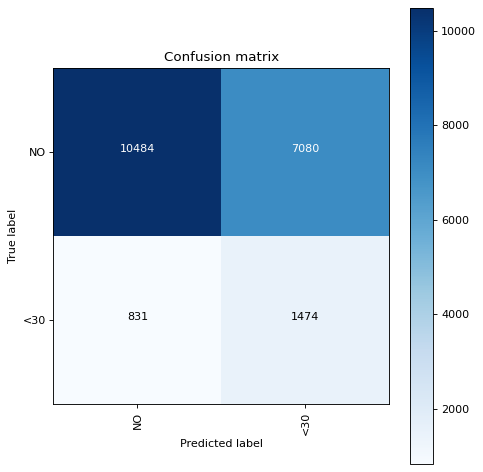

In [321]:
plot_confusion_matrix(y_test,rf_select_10_test_preds,threshold_rf_select_10)

### 1.3 Red neuronal


Creación y entrenamiento del modelo


In [322]:
rn_select_10_pred,rn_select_10_pred_train,modelo_select_10,history_select_10=ejecutarRedNeuronal(X_train_select_10_rn, y_train_select_10_rn, X_val[vals_10], y_val,X_test[vals_10],batch_size=100,epoch=4,title="Rd_con_seleccion de caracteristicas")

entrenar modelo
Epoch 1/4
451/451 [==============================] - 4s 8ms/step - loss: 0.6730 - accuracy: 0.5860 - precision_7: 0.5877 - val_loss: 0.6547 - val_accuracy: 0.6247 - val_precision_7: 0.1688
Epoch 2/4
451/451 [==============================] - 3s 7ms/step - loss: 0.6599 - accuracy: 0.6128 - precision_7: 0.6063 - val_loss: 0.6996 - val_accuracy: 0.5570 - val_precision_7: 0.1582
Epoch 3/4
451/451 [==============================] - 3s 7ms/step - loss: 0.6553 - accuracy: 0.6188 - precision_7: 0.6111 - val_loss: 0.6725 - val_accuracy: 0.5344 - val_precision_7: 0.1546
Epoch 4/4
451/451 [==============================] - 3s 7ms/step - loss: 0.6529 - accuracy: 0.6232 - precision_7: 0.6132 - val_loss: 0.6433 - val_accuracy: 0.6108 - val_precision_7: 0.1668


visualizar conportamiento durante el entrenamiento

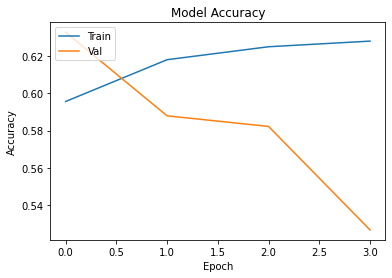

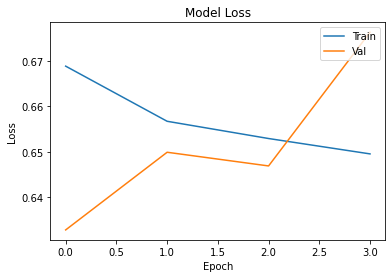

In [ ]:
#visualizar accuracy y loss en el entrenamiento
plot_acc(history_select_10)
plot_loss(history_select_10)

Evaluar model: metricas y matriz de confusion

In [334]:
threshold_rn_select_10=0.48

print("resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:")
rn_train_select_10=evaluarModelo(y_train_select_10_rn,rn_select_10_pred_train, threshold_rn_select_10, "RN_train_10")
rn_test_select_10=evaluarModelo(y_test,rn_select_10_pred, threshold_rn_select_10, "RN_Test_10")
rn_train_select_10.join(rn_test_select_10)

resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:


,RN_train_10,RN_Test_10
AUC,0.633187,0.618451
exactitud,0.633187,0.593638
precision,0.621503,0.171057
Recall/sensibilidad,0.681266,0.650759
especifidad,0.681266,0.650759
f1,0.650014,0.270905


Confusion matrix, without normalization
[[10520  7044]
 [  833  1472]]


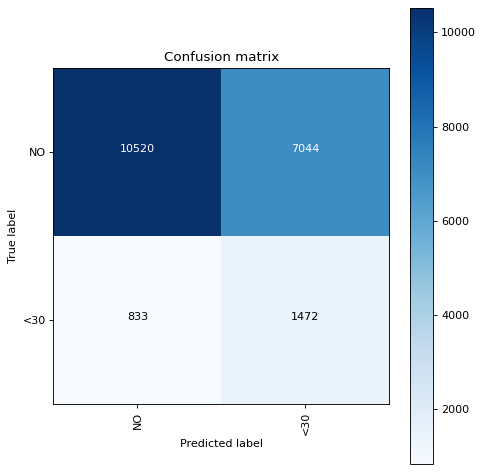

In [331]:
plot_confusion_matrix(y_test,rn_select_10_pred,threshold_rn_select_10)

### 1.4 Conbinacion de todos los modelos

In [349]:
threshold_ensemble_10=0.49
lists_of_lists=[rn_select_10_pred*0.5/threshold_rn_select_10,  rf_select_10_test_preds*0.5/threshold_rf_select_10, arbol_select_10_test_preds*0.5/threshold_tree_select_10]
result_select_10=np.array([sum(x)/len(lists_of_lists) for x in zip(*lists_of_lists)])
ensemble_test_select_10=evaluarModelo(y_test,result_select_10, threshold_ensemble_10, "ensemble_Test_10")
ensemble_test_select_10

,ensemble_Test_10
AUC,0.611841
exactitud,0.611606
precision,0.171363
Recall/sensibilidad,0.612148
especifidad,0.612148
f1,0.267767


Confusion matrix, without normalization
[[11088  6476]
 [  938  1367]]


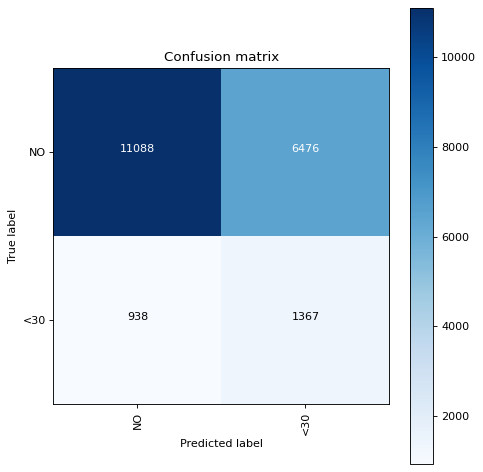

In [346]:
plot_confusion_matrix(y_test,result_select_10,threshold_ensemble_10)

### 1.5 Comparacion de los modelos

In [350]:
df_result_select_10=arbol_train_select_10
all_df=[ rf_train_select_10, rn_train_select_10, arbol_test_select_10, rf_test_select_10, rn_test_select_10,ensemble_test_select_10]

for next_df in all_df:
 df_result_select_10=df_result_select_10.join(next_df) 

df_result_select_10

,arbol_train_10,RF_train_10,RN_train_10,arbol_Test_10,RF_Test_10,RN_Test_10,ensemble_Test_10
AUC,0.727134,0.751064,0.633187,0.582022,0.618191,0.618451,0.611841
exactitud,0.727134,0.751064,0.633187,0.560219,0.601842,0.593638,0.611606
precision,0.674660,0.698127,0.621503,0.152157,0.172317,0.171057,0.171363
Recall/sensibilidad,0.877350,0.884659,0.681266,0.610412,0.639479,0.650759,0.612148
especifidad,0.877350,0.884659,0.681266,0.610412,0.639479,0.650759,0.612148
f1,0.762770,0.780402,0.650014,0.243594,0.271480,0.270905,0.267767


## Seleccion de 20 caracteristicas categoricas

In [353]:
vals_20=p_values.index[-20:].tolist()

vals_20=vals_20+columnas_numericas

In [354]:
over_2 = SMOTE(random_state = 30,sampling_strategy=0.6)
under_2 = RandomUnderSampler(random_state=30)

X_train_select_20, y_train_select_20 = over_2.fit_resample(X_train[vals_20], y_train)
X_train_select_20, y_train_select_20 = under_2.fit_resample(X_train_select_20, y_train_select_20)


X_train_select_20_rn, y_train_select_20_rn = over_2.fit_resample(X_train_rn[vals_20], y_train_rn)
X_train_select_20_rn, y_train_select_20_rn = under_2.fit_resample(X_train_select_20_rn, y_train_select_20_rn)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

### 1.1 Arboles de decision

Creación y entrenamiento del modelo


In [355]:
from sklearn.tree import DecisionTreeClassifier

arbol_select_20 = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_select_20.fit(X_train_select_20, y_train_select_20)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [364]:
arbol_select_20_train_preds = arbol_select_20.predict_proba(X_train_select_20)[:,1]
arbol_select_20_test_preds = arbol_select_20.predict_proba(X_test[vals_20])[:,1]

threshold_tree_select_20=0.21

print("resultados del entrenamiento del Random Forest con selectsampling:")
arbol_train_select_20=evaluarModelo(y_train_select_20,arbol_select_20_train_preds, threshold_tree_select_20, "arbol_train_20")
arbol_test_select_20=evaluarModelo(y_test,arbol_select_20_test_preds, threshold_tree_select_20, "arbol_Test_20")
arbol_train_select_20.join(arbol_test_select_20)

resultados del entrenamiento del Random Forest con selectsampling:


,arbol_train_20,arbol_Test_20
AUC,0.761714,0.581561
exactitud,0.761714,0.586391
precision,0.700890,0.154816
Recall/sensibilidad,0.913101,0.575271
especifidad,0.913101,0.575271
f1,0.793044,0.243974


Confusion matrix, without normalization
[[10325  7239]
 [  979  1326]]


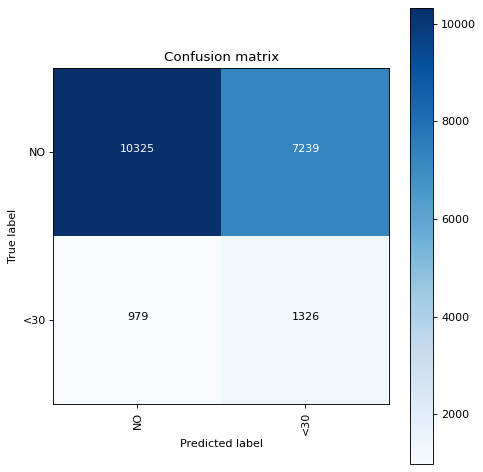

In [365]:
plot_confusion_matrix(y_test,arbol_select_20_test_preds,threshold_tree_select_20)

### 1.2Random forest

Creación y entrenamiento del modelo


In [366]:
from sklearn.ensemble import RandomForestClassifier
rf_select_20 =RandomForestClassifier(n_estimators=100, 
     max_depth=10, random_state=30)
rf_select_20.fit(X_train_select_20, y_train_select_20)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Evaluar model: metricas y matriz de confusion

In [381]:
rf_select_20_train_preds = rf_select_20.predict_proba(X_train_select_20)[:,1]
rf_select_20_test_preds = rf_select_20.predict_proba(X_test[vals_20])[:,1]

threshold_rf_select_20=0.33

print("resultados del entrenamiento del arbol de decision con select with 20 features")
rf_train_select_20=evaluarModelo(y_train_select_20,rf_select_20_train_preds, threshold_rf_select_20, "RF_train_20")
rf_test_select_20=evaluarModelo(y_test,rf_select_20_test_preds, threshold_rf_select_20, "RF_Test_20")
rf_train_select_20.join(rf_test_select_20)

resultados del entrenamiento del arbol de decision con select with 20 features


,RF_train_20,RF_Test_20
AUC,0.750053,0.616597
exactitud,0.750053,0.582364
precision,0.688322,0.168565
Recall/sensibilidad,0.913953,0.661171
especifidad,0.913953,0.661171
f1,0.785251,0.268641


Confusion matrix, without normalization
[[10047  7517]
 [  781  1524]]


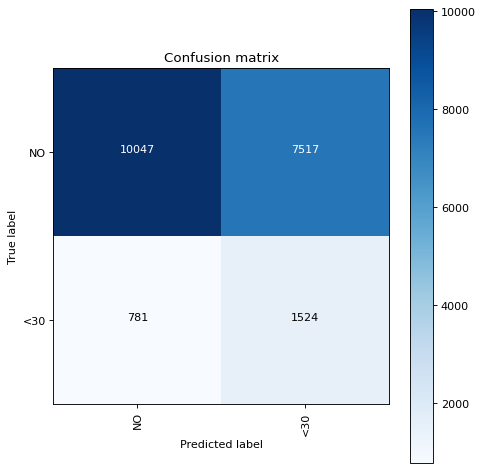

In [379]:
plot_confusion_matrix(y_test,rf_select_20_test_preds,threshold_rf_select_20)

### 1.3 Red neuronal


Creación y entrenamiento del modelo


In [382]:
rn_select_20_pred,rn_select_20_pred_train,modelo_select_20,history_select_20=ejecutarRedNeuronal(X_train_select_20_rn, y_train_select_20_rn, X_val[vals_20], y_val,X_test[vals_20],batch_size=100,epoch=4,title="Rd_con_seleccion de caracteristicas")

entrenar modelo
Epoch 1/4
677/677 [==============================] - 6s 7ms/step - loss: 0.6666 - accuracy: 0.5956 - precision_8: 0.5875 - val_loss: 0.7163 - val_accuracy: 0.4586 - val_precision_8: 0.1449
Epoch 2/4
677/677 [==============================] - 4s 6ms/step - loss: 0.6497 - accuracy: 0.6240 - precision_8: 0.6118 - val_loss: 0.5981 - val_accuracy: 0.6478 - val_precision_8: 0.1742
Epoch 3/4
677/677 [==============================] - 4s 6ms/step - loss: 0.6422 - accuracy: 0.6343 - precision_8: 0.6242 - val_loss: 0.6665 - val_accuracy: 0.5563 - val_precision_8: 0.1565
Epoch 4/4
677/677 [==============================] - 4s 6ms/step - loss: 0.6356 - accuracy: 0.6415 - precision_8: 0.6300 - val_loss: 0.7008 - val_accuracy: 0.5448 - val_precision_8: 0.1557


visualizar conportamiento durante el entrenamiento

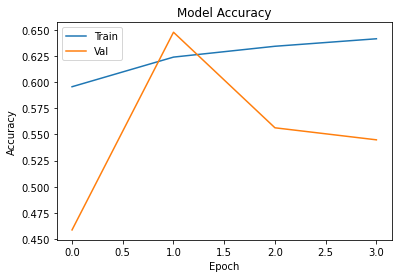

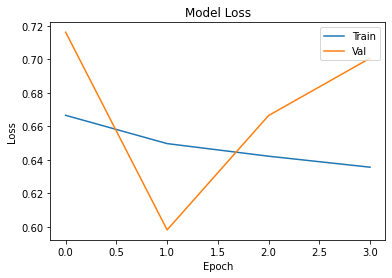

In [383]:
#visualizar accuracy y loss en el entrenamiento
plot_acc(history_select_20)
plot_loss(history_select_20)

Evaluar model: metricas y matriz de confusion

In [400]:
threshold_rn_select_20=0.54

print("resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:")
rn_train_select_20=evaluarModelo(y_train_select_20_rn,rn_select_20_pred_train, threshold_rn_select_20, "RN_train_20")
rn_test_select_20=evaluarModelo(y_test,rn_select_20_pred, threshold_rn_select_20, "RN_Test_20")
rn_train_select_20.join(rn_test_select_20)

resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:


,RN_train_20,RN_Test_20
AUC,0.655618,0.614120
exactitud,0.655618,0.584982
precision,0.634626,0.167989
Recall/sensibilidad,0.733582,0.652061
especifidad,0.733582,0.652061
f1,0.680525,0.267153


Confusion matrix, without normalization
[[10120  7444]
 [  802  1503]]


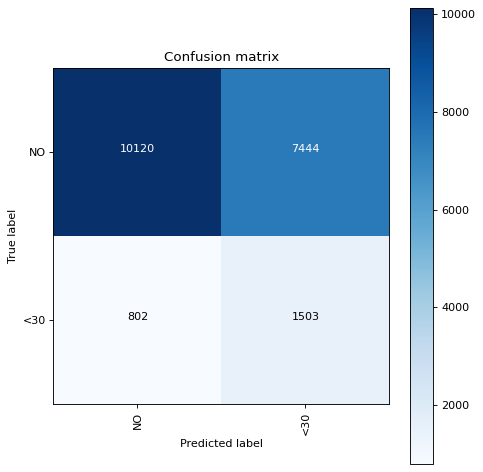

In [401]:
plot_confusion_matrix(y_test,rn_select_20_pred,threshold_rn_select_20)

### 1.4 Conbinacion de todos los modelos

In [408]:
threshold_ensemble_20=0.49
lists_of_lists=[rn_select_20_pred*0.5/threshold_rn_select_20,  rf_select_20_test_preds*0.5/threshold_rf_select_20, arbol_select_20_test_preds*0.5/threshold_tree_select_20]
result_select_20=np.array([sum(x)/len(lists_of_lists) for x in zip(*lists_of_lists)])
ensemble_test_select_20=evaluarModelo(y_test,result_select_20, threshold_ensemble_20, "ensemble_Test_20")
ensemble_test_select_20

,ensemble_Test_20
AUC,0.612539
exactitud,0.597514
precision,0.169300
Recall/sensibilidad,0.632104
especifidad,0.632104
f1,0.267070


Confusion matrix, without normalization
[[10415  7149]
 [  848  1457]]


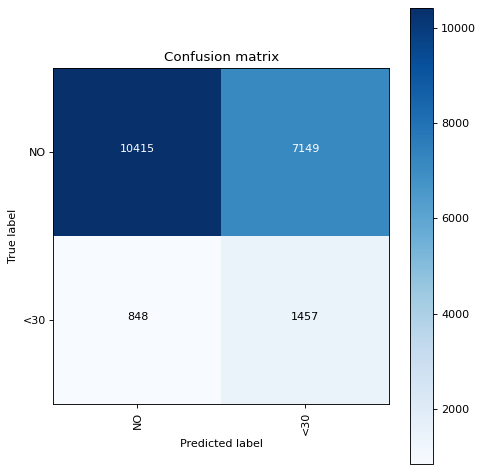

In [409]:
plot_confusion_matrix(y_test,result_select_20,threshold_ensemble_20)

### 1.5 Comparacion de los modelos

In [410]:
df_result_select=arbol_train_select_20
all_df=[ rf_train_select_20, rn_train_select_20, arbol_test_select_20, rf_test_select_20, rn_test_select_20,ensemble_test_select_20]

for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 

df_result_select

,arbol_train_20,RF_train_20,RN_train_20,arbol_Test_20,RF_Test_20,RN_Test_20,ensemble_Test_20
AUC,0.761714,0.750053,0.655618,0.581561,0.616597,0.614120,0.612539
exactitud,0.761714,0.750053,0.655618,0.586391,0.582364,0.584982,0.597514
precision,0.700890,0.688322,0.634626,0.154816,0.168565,0.167989,0.169300
Recall/sensibilidad,0.913101,0.913953,0.733582,0.575271,0.661171,0.652061,0.632104
especifidad,0.913101,0.913953,0.733582,0.575271,0.661171,0.652061,0.632104
f1,0.793044,0.785251,0.680525,0.243974,0.268641,0.267153,0.267070


## Seleccion de 15 caracteristicas categoricas

In [415]:
vals_15=p_values.index[-15:].tolist()
vals_15=vals_15+columnas_numericas


In [416]:
over_2 = SMOTE(random_state = 30,sampling_strategy=0.6)
under_2 = RandomUnderSampler(random_state=30)

X_train_select_15, y_train_select_15 = over_2.fit_resample(X_train[vals_15], y_train)
X_train_select_15, y_train_select_15 = under_2.fit_resample(X_train_select_15, y_train_select_15)


X_train_select_15_rn, y_train_select_15_rn = over_2.fit_resample(X_train_rn[vals_15], y_train_rn)
X_train_select_15_rn, y_train_select_15_rn = under_2.fit_resample(X_train_select_15_rn, y_train_select_15_rn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

### 1.1 Arboles de decision

Creación y entrenamiento del modelo


In [417]:
from sklearn.tree import DecisionTreeClassifier

arbol_select_15 = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_select_15.fit(X_train_select_15, y_train_select_15)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [427]:
arbol_select_15_train_preds = arbol_select_15.predict_proba(X_train_select_15)[:,1]
arbol_select_15_test_preds = arbol_select_15.predict_proba(X_test[vals_15])[:,1]

threshold_tree_select_15=0.21

print("resultados del entrenamiento del Random Forest con selectsampling:")
arbol_train_select_15=evaluarModelo(y_train_select_15,arbol_select_15_train_preds, threshold_tree_select_15, "arbol_train_15")
arbol_test_select_15=evaluarModelo(y_test,arbol_select_15_test_preds, threshold_tree_select_15, "arbol_Test_15")
arbol_train_select_15.join(arbol_test_select_15)

resultados del entrenamiento del Random Forest con selectsampling:


,arbol_train_15,arbol_Test_15
AUC,0.735945,0.577440
exactitud,0.735945,0.538125
precision,0.670705,0.148311
Recall/sensibilidad,0.927032,0.628633
especifidad,0.927032,0.628633
f1,0.778307,0.240000


Confusion matrix, without normalization
[[9243 8321]
 [ 856 1449]]


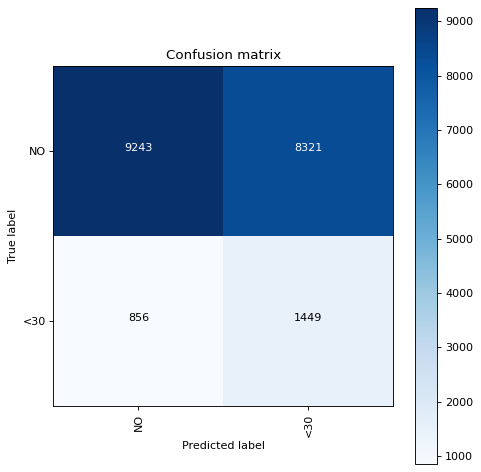

In [428]:
plot_confusion_matrix(y_test,arbol_select_15_test_preds,threshold_tree_select_15)

### 1.2Random forest

Creación y entrenamiento del modelo


In [429]:
from sklearn.ensemble import RandomForestClassifier
rf_select_15 =RandomForestClassifier(n_estimators=100,
     max_depth=10, random_state=30)
rf_select_15.fit(X_train_select_15, y_train_select_15)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Evaluar model: metricas y matriz de confusion

In [437]:
rf_select_15_train_preds = rf_select_15.predict_proba(X_train_select_15)[:,1]
rf_select_15_test_preds = rf_select_15.predict_proba(X_test[vals_15])[:,1]

threshold_rf_select_15=0.31

print("resultados del entrenamiento del arbol de decision con select with 20 features")
rf_train_select_15=evaluarModelo(y_train_select_15,rf_select_15_train_preds, threshold_rf_select_15, "RF_train_15")
rf_test_select_15=evaluarModelo(y_test,rf_select_15_test_preds, threshold_rf_select_15, "RF_Test_15")
rf_train_select_15.join(rf_test_select_15)

resultados del entrenamiento del arbol de decision con select with 20 features


,RF_train_15,RF_Test_15
AUC,0.743395,0.613151
exactitud,0.743395,0.556948
precision,0.677720,0.163734
Recall/sensibilidad,0.928168,0.686334
especifidad,0.928168,0.686334
f1,0.783414,0.264394


Confusion matrix, without normalization
[[9484 8080]
 [ 723 1582]]


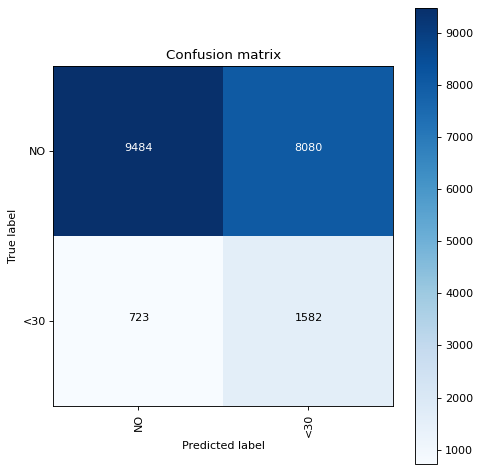

In [438]:
plot_confusion_matrix(y_test,rf_select_15_test_preds,threshold_rf_select_15)

### 1.3 Red neuronal


Creación y entrenamiento del modelo


In [439]:
rn_select_15_pred,rn_select_15_pred_train,modelo_select_15,history_select_15=ejecutarRedNeuronal(X_train_select_15_rn, y_train_select_15_rn, X_val[vals_15], y_val,X_test[vals_15],batch_size=100,epoch=6,title="Rd_con_seleccion de caracteristicas")

entrenar modelo
Epoch 1/6
677/677 [==============================] - 6s 7ms/step - loss: 0.6673 - accuracy: 0.5977 - precision_9: 0.5922 - val_loss: 0.6848 - val_accuracy: 0.5958 - val_precision_9: 0.1660
Epoch 2/6
677/677 [==============================] - 4s 7ms/step - loss: 0.6519 - accuracy: 0.6226 - precision_9: 0.6121 - val_loss: 0.7073 - val_accuracy: 0.5121 - val_precision_9: 0.1531
Epoch 3/6
677/677 [==============================] - 4s 7ms/step - loss: 0.6464 - accuracy: 0.6323 - precision_9: 0.6195 - val_loss: 0.6081 - val_accuracy: 0.6367 - val_precision_9: 0.1710
Epoch 4/6
677/677 [==============================] - 4s 6ms/step - loss: 0.6415 - accuracy: 0.6370 - precision_9: 0.6267 - val_loss: 0.6385 - val_accuracy: 0.6250 - val_precision_9: 0.1687
Epoch 5/6
677/677 [==============================] - 4s 6ms/step - loss: 0.6359 - accuracy: 0.6441 - precision_9: 0.6340 - val_loss: 0.5891 - val_accuracy: 0.6591 - val_precision_9: 0.1764
Epoch 6/6
677/677 [====================

visualizar conportamiento durante el entrenamiento

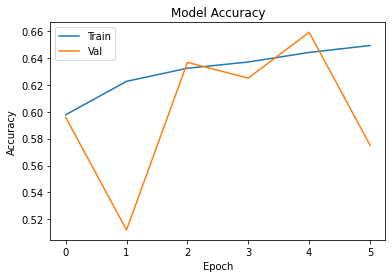

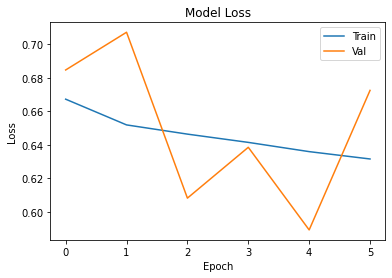

In [440]:
#visualizar accuracy y loss en el entrenamiento
plot_acc(history_select_15)
plot_loss(history_select_15)

Evaluar model: metricas y matriz de confusion

In [462]:
threshold_rn_select_15=0.49

print("resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:")
rn_train_select_15=evaluarModelo(y_train_select_15_rn,rn_select_15_pred_train, threshold_rn_select_15, "RN_train_15")
rn_test_select_15=evaluarModelo(y_test,rn_select_15_pred, threshold_rn_select_15, "RN_Test_15")
rn_train_select_15.join(rn_test_select_15)

resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:


,RN_train_15,RN_Test_15
AUC,0.663324,0.609201
exactitud,0.663324,0.565957
precision,0.634285,0.163417
Recall/sensibilidad,0.771447,0.665510
especifidad,0.771447,0.665510
f1,0.696174,0.262402


Confusion matrix, without normalization
[[9711 7853]
 [ 771 1534]]


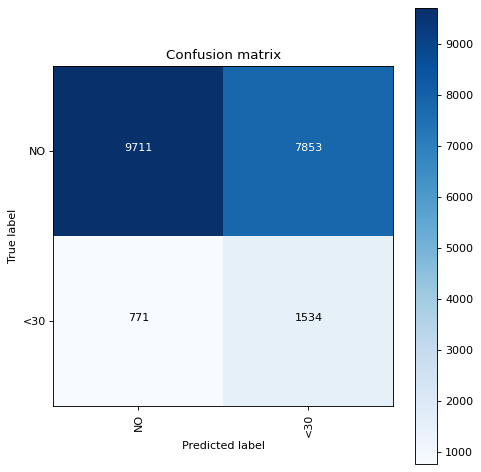

In [450]:
plot_confusion_matrix(y_test,rn_select_15_pred,threshold_rn_select_15)

### 1.4 Conbinacion de todos los modelos

In [458]:
threshold_ensemble_15=0.5
lists_of_lists=[rn_select_15_pred*0.5/threshold_rn_select_15,  rf_select_15_test_preds*0.5/threshold_rf_select_15, arbol_select_15_test_preds*0.5/threshold_tree_select_15]
result_select_15=np.array([sum(x)/len(lists_of_lists) for x in zip(*lists_of_lists)])
ensemble_test_select_15=evaluarModelo(y_test,result_select_15, threshold_ensemble_15, "ensemble_Test_15")
ensemble_test_select_15

,ensemble_Test_15
AUC,0.609160
exactitud,0.586542
precision,0.166253
Recall/sensibilidad,0.638612
especifidad,0.638612
f1,0.263823


Confusion matrix, without normalization
[[10415  7149]
 [  848  1457]]


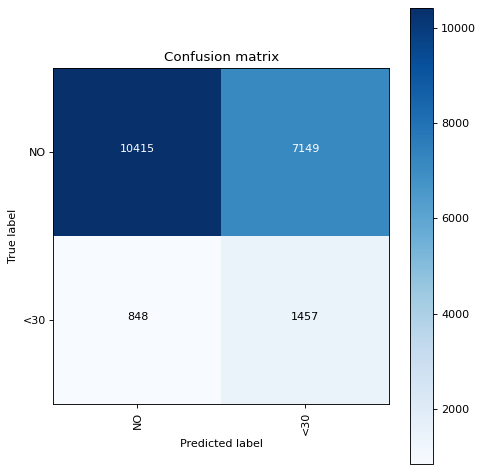

In [459]:
plot_confusion_matrix(y_test,result_select_20,threshold_ensemble_20)

### 1.5 Comparacion de los modelos

In [463]:
df_result_select=arbol_train_select_15
all_df=[ rf_train_select_15, rn_train_select_15, arbol_test_select_15, rf_test_select_15, rn_test_select_15,ensemble_test_select_15]

for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 

df_result_select

,arbol_train_15,RF_train_15,RN_train_15,arbol_Test_15,RF_Test_15,RN_Test_15,ensemble_Test_15
AUC,0.735945,0.743395,0.663324,0.577440,0.613151,0.609201,0.609160
exactitud,0.735945,0.743395,0.663324,0.538125,0.556948,0.565957,0.586542
precision,0.670705,0.677720,0.634285,0.148311,0.163734,0.163417,0.166253
Recall/sensibilidad,0.927032,0.928168,0.771447,0.628633,0.686334,0.665510,0.638612
especifidad,0.927032,0.928168,0.771447,0.628633,0.686334,0.665510,0.638612
f1,0.778307,0.783414,0.696174,0.240000,0.264394,0.262402,0.263823


# C. modelos con seleccion de caracteristicas con CHI-SQUARE ++ Random Under Sampling

## Seleccion de 10 caracteristicas categoricas + todas las numericas

In [467]:
under_10_down = RandomUnderSampler(random_state=30)
X_train_select_10_down, y_train_select_10_down = under_10_down.fit_resample(X_train[vals_10], y_train)
X_train_select_10_down_rn, y_train_select_10_down_rn = under_10_down.fit_resample(X_train_rn[vals_10], y_train_rn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 1.1 Arboles de decision

Creación y entrenamiento del modelo


In [468]:
from sklearn.tree import DecisionTreeClassifier

arbol_select_10_down = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_select_10_down.fit(X_train_select_10_down, y_train_select_10_down)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [660]:
arbol_select_10_down_train_preds = arbol_select_10_down.predict_proba(X_train_select_10_down)[:,1]
arbol_select_10_down_test_preds = arbol_select_10_down.predict_proba(X_test[vals_10])[:,1]

threshold_tree_select_10_down=0.48

print("resultados del entrenamiento del Random Forest con selectsampling:")
arbol_train_select_10_down=evaluarModelo(y_train_select_10_down,arbol_select_10_down_train_preds, threshold_tree_select_10_down, "arbol_train_10")
arbol_test_select_10_down=evaluarModelo(y_test,arbol_select_10_down_test_preds, threshold_tree_select_10_down, "arbol_Test_10_down")
arbol_train_select_10_down.join(arbol_test_select_10_down)

resultados del entrenamiento del Random Forest con selectsampling:


,arbol_train_10,arbol_Test_10_down
AUC,0.692419,0.589094
exactitud,0.692419,0.609039
precision,0.703295,0.161062
Recall/sensibilidad,0.665668,0.563124
especifidad,0.665668,0.563124
f1,0.683964,0.250482


Confusion matrix, without normalization
[[10803  6761]
 [ 1007  1298]]


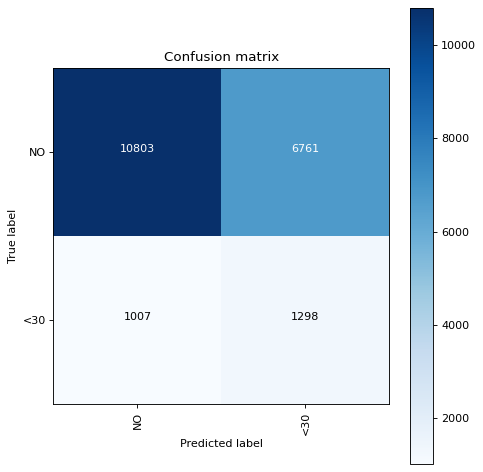

In [480]:
plot_confusion_matrix(y_test,arbol_select_10_down_test_preds,threshold_tree_select_10_down)

### 1.2Random forest

Creación y entrenamiento del modelo


In [487]:
from sklearn.ensemble import RandomForestClassifier
rf_select_10_down =RandomForestClassifier(n_estimators=100,
     max_depth=10, random_state=30)
rf_select_10_down.fit(X_train_select_10_down, y_train_select_10_down)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Evaluar model: metricas y matriz de confusion

In [661]:
rf_select_10_down_train_preds = rf_select_10_down.predict_proba(X_train_select_10_down)[:,1]
rf_select_10_down_test_preds = rf_select_10_down.predict_proba(X_test[vals_10])[:,1]

threshold_rf_select_10_down=0.47

print("resultados del entrenamiento del arbol de decision con select with 20 features")
rf_train_select_10_down=evaluarModelo(y_train_select_10_down,rf_select_10_down_train_preds, threshold_rf_select_10_down, "RF_train_10_down")
rf_test_select_10_down=evaluarModelo(y_test,rf_select_10_down_test_preds, threshold_rf_select_10_down, "RF_Test_10_down")
rf_train_select_10_down.join(rf_test_select_10_down)

resultados del entrenamiento del arbol de decision con select with 20 features


,RF_train_10_down,RF_Test_10_down
AUC,0.690920,0.621748
exactitud,0.690920,0.588807
precision,0.680672,0.171576
Recall/sensibilidad,0.719281,0.664642
especifidad,0.719281,0.664642
f1,0.699444,0.272743


Confusion matrix, without normalization
[[10167  7397]
 [  773  1532]]


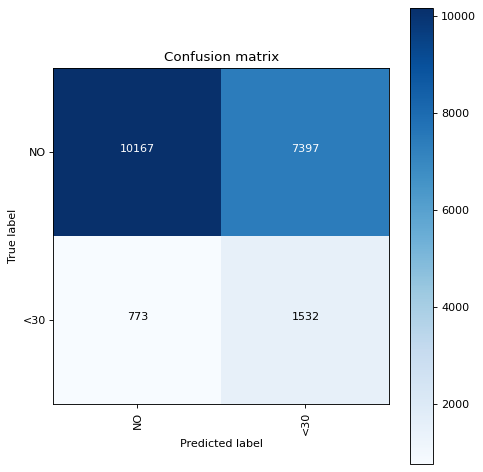

In [499]:
plot_confusion_matrix(y_test,rf_select_10_down_test_preds,threshold_rf_select_10_down)

### 1.3 Red neuronal


Creación y entrenamiento del modelo


In [501]:
rn_select_10_down_pred,rn_select_10_down_pred_train,modelo_select_10_down,history_select_10_down=ejecutarRedNeuronal(X_train_select_10_down_rn, y_train_select_10_down_rn, X_val[vals_10], y_val,X_test[vals_10],batch_size=10,epoch=4,title="Rd_con_seleccion de caracteristicas")

entrenar modelo
Epoch 1/4
1448/1448 [==============================] - 14s 9ms/step - loss: 0.6814 - accuracy: 0.5708 - precision_11: 0.5745 - val_loss: 0.6014 - val_accuracy: 0.7200 - val_precision_11: 0.1824
Epoch 2/4
1448/1448 [==============================] - 12s 8ms/step - loss: 0.6711 - accuracy: 0.5967 - precision_11: 0.6056 - val_loss: 0.6935 - val_accuracy: 0.6443 - val_precision_11: 0.1696
Epoch 3/4
1448/1448 [==============================] - 12s 8ms/step - loss: 0.6674 - accuracy: 0.6026 - precision_11: 0.6145 - val_loss: 0.6641 - val_accuracy: 0.6567 - val_precision_11: 0.1728
Epoch 4/4
1448/1448 [==============================] - 12s 8ms/step - loss: 0.6662 - accuracy: 0.6031 - precision_11: 0.6074 - val_loss: 0.6483 - val_accuracy: 0.6592 - val_precision_11: 0.1741


visualizar conportamiento durante el entrenamiento

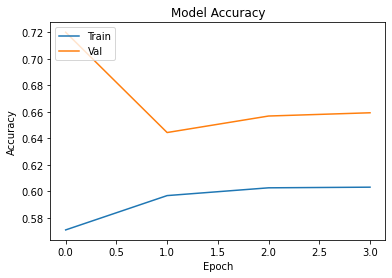

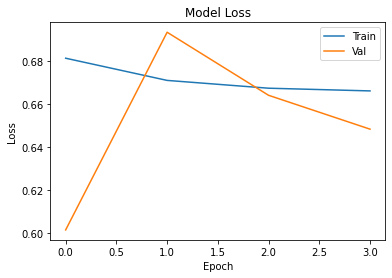

In [502]:
#visualizar accuracy y loss en el entrenamiento
plot_acc(history_select_10_down)
plot_loss(history_select_10_down)

Evaluar model: metricas y matriz de confusion

In [732]:
threshold_rn_select_10_down=0.45

print("resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:")
rn_train_select_10_down=evaluarModelo(y_train_select_10_down_rn,rn_select_10_down_pred_train, threshold_rn_select_10_down, "RN_train_10_down")
rn_test_select_10_down=evaluarModelo(y_test,rn_select_10_down_pred, threshold_rn_select_10_down, "RN_Test_10_down")
rn_train_select_10_down.join(rn_test_select_10_down)

resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:


,RN_train_10_down,RN_Test_10_down
AUC,0.611479,0.610879
exactitud,0.611479,0.606573
precision,0.608995,0.170098
Recall/sensibilidad,0.622876,0.616486
especifidad,0.622876,0.616486
f1,0.615857,0.266629


Confusion matrix, without normalization
[[10631  6933]
 [  884  1421]]


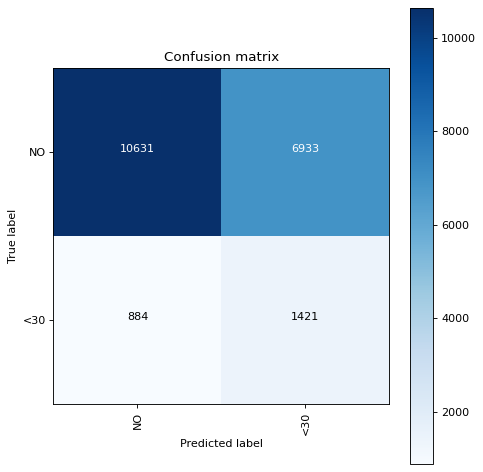

In [514]:
plot_confusion_matrix(y_test,rn_select_10_down_pred,threshold_rn_select_10_down)

### 1.4 Conbinacion de todos los modelos

In [526]:
threshold_ensemble_10=0.49
lists_of_lists=[rn_select_10_down_pred*0.5/threshold_rn_select_10_down,  rf_select_10_down_test_preds*0.5/threshold_rf_select_10_down, arbol_select_10_down_test_preds*0.5/threshold_tree_select_10_down]
result_select_10_down=np.array([sum(x)/len(lists_of_lists) for x in zip(*lists_of_lists)])
ensemble_test_select_10_down=evaluarModelo(y_test,result_select_10_down, threshold_ensemble_10, "ensemble_Test_10_down")
ensemble_test_select_10_down

,ensemble_Test_10
AUC,0.607860
exactitud,0.581912
precision,0.165067
Recall/sensibilidad,0.641649
especifidad,0.641649
f1,0.262583


Confusion matrix, without normalization
[[10083  7481]
 [  826  1479]]


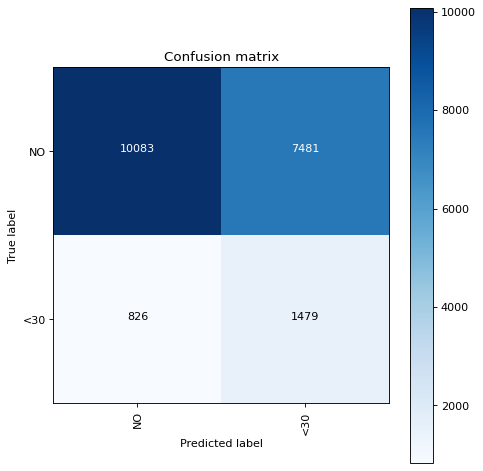

In [527]:
plot_confusion_matrix(y_test,result_select_10_down,threshold_ensemble_10)

### 1.5 Comparacion de los modelos

In [528]:
df_result_select_10=arbol_train_select_10
all_df=[ rf_train_select_10, rn_train_select_10, arbol_test_select_10, rf_test_select_10, rn_test_select_10,ensemble_test_select_10]

for next_df in all_df:
 df_result_select_10=df_result_select_10.join(next_df) 

df_result_select_10

,arbol_train_10,RF_train_10,RN_train_10,arbol_Test_10,RF_Test_10,RN_Test_10,ensemble_Test_10
AUC,0.727134,0.740119,0.633187,0.582022,0.614018,0.618451,0.611841
exactitud,0.727134,0.740119,0.633187,0.560219,0.571141,0.593638,0.611606
precision,0.674660,0.682495,0.621503,0.152157,0.165950,0.171057,0.171363
Recall/sensibilidad,0.877350,0.897999,0.681266,0.610412,0.669848,0.650759,0.612148
especifidad,0.877350,0.897999,0.681266,0.610412,0.669848,0.650759,0.612148
f1,0.762770,0.775555,0.650014,0.243594,0.266001,0.270905,0.267767


## Seleccion de 20 caracteristicas categoricas + todas las numericas

In [530]:
under_20_down = RandomUnderSampler(random_state=30)
X_train_select_20_down, y_train_select_20_down = under_20_down.fit_resample(X_train[vals_20], y_train)
X_train_select_20_down_rn, y_train_select_20_down_rn = under_20_down.fit_resample(X_train_rn[vals_20], y_train_rn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 1.1 Arboles de decision

Creación y entrenamiento del modelo


In [531]:
from sklearn.tree import DecisionTreeClassifier

arbol_select_20_down = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_select_20_down.fit(X_train_select_20_down, y_train_select_20_down)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [668]:
arbol_select_20_down_train_preds = arbol_select_20_down.predict_proba(X_train_select_20_down)[:,1]
arbol_select_20_down_test_preds = arbol_select_20_down.predict_proba(X_test[vals_20])[:,1]

threshold_tree_select_20_down=0.47

print("resultados del entrenamiento del Random Forest con selectsampling:")
arbol_train_select_20_down=evaluarModelo(y_train_select_20_down,arbol_select_20_down_train_preds, threshold_tree_select_20_down, "arbol_train_20_down")
arbol_test_select_20_down=evaluarModelo(y_test,arbol_select_20_down_test_preds, threshold_tree_select_20_down, "arbol_Test_20_down")
arbol_train_select_20_down.join(arbol_test_select_20_down)

resultados del entrenamiento del Random Forest con selectsampling:


,arbol_train_20_down,arbol_Test_20_down
AUC,0.694306,0.595831
exactitud,0.694306,0.589964
precision,0.692893,0.161294
Recall/sensibilidad,0.697969,0.603471
especifidad,0.697969,0.603471
f1,0.695421,0.254552


Confusion matrix, without normalization
[[10331  7233]
 [  914  1391]]


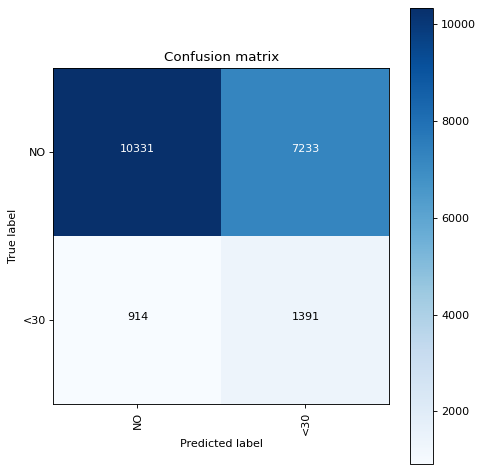

In [541]:
plot_confusion_matrix(y_test,arbol_select_20_down_test_preds,threshold_tree_select_20_down)

### 1.2Random forest

Creación y entrenamiento del modelo


In [542]:
from sklearn.ensemble import RandomForestClassifier
rf_select_20_down =RandomForestClassifier(n_estimators=100,
     max_depth=10, random_state=30)
rf_select_20_down.fit(X_train_select_20_down, y_train_select_20_down)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Evaluar model: metricas y matriz de confusion

In [669]:
rf_select_20_down_train_preds = rf_select_20_down.predict_proba(X_train_select_20_down)[:,1]
rf_select_20_down_test_preds = rf_select_20_down.predict_proba(X_test[vals_20])[:,1]

threshold_rf_select_20_down=0.47

print("resultados del entrenamiento del arbol de decision con select with 20 features")
rf_train_select_20_down=evaluarModelo(y_train_select_20_down,rf_select_20_down_train_preds, threshold_rf_select_20_down, "RF_train_20_down")
rf_test_select_20_down=evaluarModelo(y_test,rf_select_20_down_test_preds, threshold_rf_select_20_down, "RF_Test_20_down")
rf_train_select_20_down.join(rf_test_select_20_down)

resultados del entrenamiento del arbol de decision con select with 20 features


,RF_train_20_down,RF_Test_20_down
AUC,0.687701,0.620775
exactitud,0.687701,0.583421
precision,0.674943,0.170347
Recall/sensibilidad,0.724165,0.669414
especifidad,0.724165,0.669414
f1,0.698688,0.271583


Confusion matrix, without normalization
[[10049  7515]
 [  762  1543]]


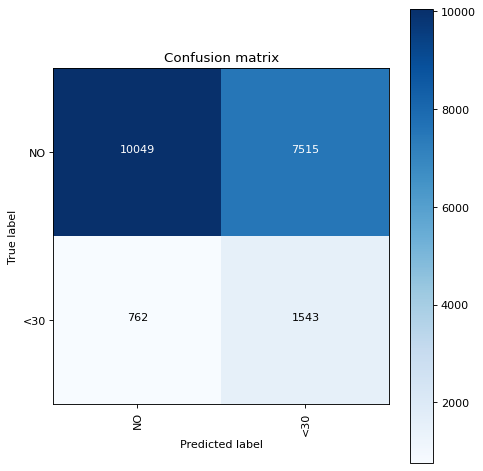

In [596]:
plot_confusion_matrix(y_test,rf_select_20_down_test_preds,threshold_rf_select_20_down)

### 1.3 Red neuronal


Creación y entrenamiento del modelo


In [560]:
rn_select_20_down_pred,rn_select_20_down_pred_train,modelo_select_20_down,history_select_20_down=ejecutarRedNeuronal(X_train_select_20_down_rn, y_train_select_20_down_rn, X_val[vals_20], y_val,X_test[vals_20],batch_size=10,epoch=4,title="Rd_con_seleccion de caracteristicas")

entrenar modelo
Epoch 1/4
1448/1448 [==============================] - 13s 9ms/step - loss: 0.6843 - accuracy: 0.5600 - precision_16: 0.5597 - val_loss: 0.6215 - val_accuracy: 0.7629 - val_precision_16: 0.1905
Epoch 2/4
1448/1448 [==============================] - 13s 9ms/step - loss: 0.6725 - accuracy: 0.5919 - precision_16: 0.6030 - val_loss: 0.6607 - val_accuracy: 0.6383 - val_precision_16: 0.1689
Epoch 3/4
1448/1448 [==============================] - 12s 8ms/step - loss: 0.6679 - accuracy: 0.5966 - precision_16: 0.6045 - val_loss: 0.6066 - val_accuracy: 0.7244 - val_precision_16: 0.1879
Epoch 4/4
1448/1448 [==============================] - 12s 8ms/step - loss: 0.6673 - accuracy: 0.6016 - precision_16: 0.6060 - val_loss: 0.6750 - val_accuracy: 0.6752 - val_precision_16: 0.1783


visualizar conportamiento durante el entrenamiento

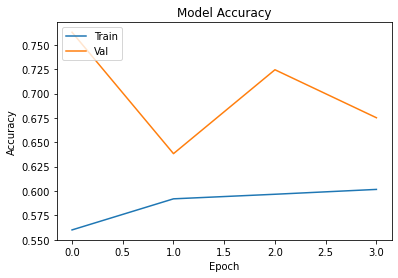

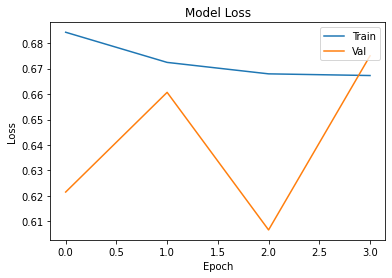

In [561]:
#visualizar accuracy y loss en el entrenamiento
plot_acc(history_select_20_down)
plot_loss(history_select_20_down)

Evaluar model: metricas y matriz de confusion

In [670]:
threshold_rn_select_20_down=0.48

print("resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:")
rn_train_select_20_down=evaluarModelo(y_train_select_20_down_rn,rn_select_20_down_pred_train, threshold_rn_select_20_down, "RN_train_20_down")
rn_test_select_20_down=evaluarModelo(y_test,rn_select_20_down_pred, threshold_rn_select_20_down, "RN_Test_20_down")
rn_train_select_20_down.join(rn_test_select_20_down)

resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:


,RN_train_20_down,RN_Test_20_down
AUC,0.613344,0.613930
exactitud,0.613344,0.598973
precision,0.608921,0.170104
Recall/sensibilidad,0.633651,0.633406
especifidad,0.633651,0.633406
f1,0.621040,0.268185


Confusion matrix, without normalization
[[10441  7123]
 [  845  1460]]


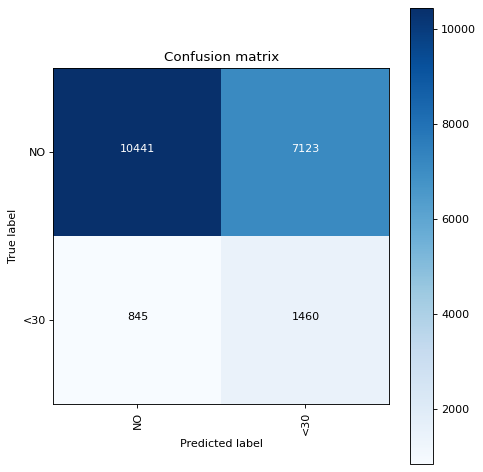

In [586]:
plot_confusion_matrix(y_test,rn_select_20_down_pred,threshold_rn_select_20_down)

### 1.4 Conbinacion de todos los modelos

In [665]:
threshold_ensemble_20=0.5
lists_of_lists=[rn_select_20_down_pred*0.5/threshold_rn_select_20_down,  rf_select_20_down_test_preds*0.5/threshold_rf_select_20_down, arbol_select_20_down_test_preds*0.5/threshold_tree_select_20_down]
result_select_20_down=np.array([sum(x)/len(lists_of_lists) for x in zip(*lists_of_lists)])
ensemble_test_select_20_down=evaluarModelo(y_test,result_select_20_down, threshold_ensemble_20, "ensemble_Test_20_down")
ensemble_test_select_20_down

,ensemble_Test_20_down
AUC,0.610003
exactitud,0.587699
precision,0.166761
Recall/sensibilidad,0.639046
especifidad,0.639046
f1,0.264500


Confusion matrix, without normalization
[[9751 7813]
 [ 787 1518]]


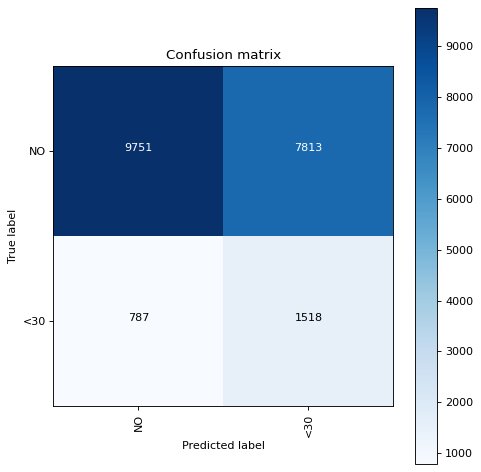

In [591]:
plot_confusion_matrix(y_test,result_select_20_down,threshold_ensemble_20)

### 1.5 Comparacion de los modelos

In [595]:
df_result_select_20=arbol_train_select_20
all_df=[ rf_train_select_20, rn_train_select_20, arbol_test_select_20, rf_test_select_20, rn_test_select_20,ensemble_test_select_20]

for next_df in all_df:
 df_result_select_20=df_result_select_20.join(next_df) 

df_result_select_20

,arbol_train_20,RF_train_20,RN_train_20,arbol_Test_20,RF_Test_20,RN_Test_20,ensemble_Test_20
AUC,0.761714,0.750053,0.655618,0.581561,0.616597,0.614120,0.612539
exactitud,0.761714,0.750053,0.655618,0.586391,0.582364,0.584982,0.597514
precision,0.700890,0.688322,0.634626,0.154816,0.168565,0.167989,0.169300
Recall/sensibilidad,0.913101,0.913953,0.733582,0.575271,0.661171,0.652061,0.632104
especifidad,0.913101,0.913953,0.733582,0.575271,0.661171,0.652061,0.632104
f1,0.793044,0.785251,0.680525,0.243974,0.268641,0.267153,0.267070


## Seleccion de 15 caracteristicas categoricas + todas las numericas

In [598]:
under_15_down = RandomUnderSampler(random_state=30)
X_train_select_15_down, y_train_select_15_down = under_15_down.fit_resample(X_train[vals_15], y_train)
X_train_select_15_down_rn, y_train_select_15_down_rn = under_15_down.fit_resample(X_train_rn[vals_15], y_train_rn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 1.1 Arboles de decision

Creación y entrenamiento del modelo


In [599]:
from sklearn.tree import DecisionTreeClassifier

arbol_select_15_down = DecisionTreeClassifier(max_depth = 12, random_state = 30)
arbol_select_15_down.fit(X_train_select_15_down, y_train_select_15_down)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Evaluar model: metricas y matriz de confusion

In [671]:
arbol_select_15_down_train_preds = arbol_select_15_down.predict_proba(X_train_select_15_down)[:,1]
arbol_select_15_down_test_preds = arbol_select_15_down.predict_proba(X_test[vals_15])[:,1]

threshold_tree_select_15_down=0.45

print("resultados del entrenamiento del Random Forest con selectsampling:")
arbol_train_select_15_down=evaluarModelo(y_train_select_15_down,arbol_select_15_down_train_preds, threshold_tree_select_15_down, "arbol_train_15_down")
arbol_test_select_15_down=evaluarModelo(y_test,arbol_select_15_down_test_preds, threshold_tree_select_15_down, "arbol_Test_15_down")
arbol_train_select_15_down.join(arbol_test_select_15_down)

resultados del entrenamiento del Random Forest con selectsampling:


,arbol_train_15_down,arbol_Test_15_down
AUC,0.691975,0.588540
exactitud,0.691975,0.559414
precision,0.680137,0.154654
Recall/sensibilidad,0.724831,0.626464
especifidad,0.724831,0.626464
f1,0.701773,0.248067


Confusion matrix, without normalization
[[9671 7893]
 [ 861 1444]]


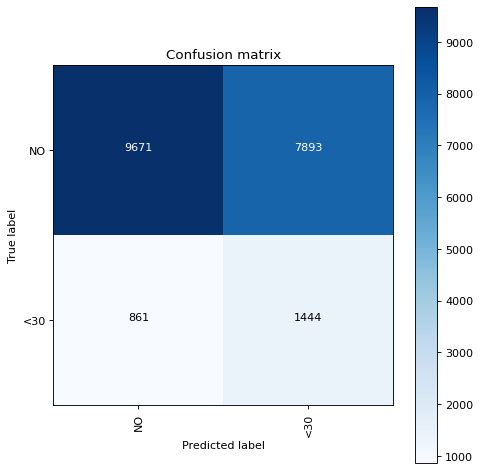

In [608]:
plot_confusion_matrix(y_test,arbol_select_15_down_test_preds,threshold_tree_select_15_down)

### 1.2Random forest

Creación y entrenamiento del modelo


In [609]:
from sklearn.ensemble import RandomForestClassifier
rf_select_15_down =RandomForestClassifier(n_estimators=100,
     max_depth=10, random_state=30)
rf_select_15_down.fit(X_train_select_15_down, y_train_select_15_down)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

Evaluar model: metricas y matriz de confusion

In [672]:
rf_select_15_down_train_preds = rf_select_15_down.predict_proba(X_train_select_15_down)[:,1]
rf_select_15_down_test_preds = rf_select_15_down.predict_proba(X_test[vals_15])[:,1]

threshold_rf_select_15_down=0.46

print("resultados del entrenamiento del arbol de decision con select with 20 features")
rf_train_select_15_down=evaluarModelo(y_train_select_15_down,rf_select_15_down_train_preds, threshold_rf_select_15_down, "RF_train_15_down")
rf_test_select_15_down=evaluarModelo(y_test,rf_select_15_down_test_preds, threshold_rf_select_15_down, "RF_Test_15_down")
rf_train_select_15_down.join(rf_test_select_15_down)

resultados del entrenamiento del arbol de decision con select with 20 features


,RF_train_15_down,RF_Test_15_down
AUC,0.689755,0.620293
exactitud,0.689755,0.561578
precision,0.669543,0.166979
Recall/sensibilidad,0.749362,0.696746
especifidad,0.749362,0.696746
f1,0.707207,0.269395


Confusion matrix, without normalization
[[9552 8012]
 [ 699 1606]]


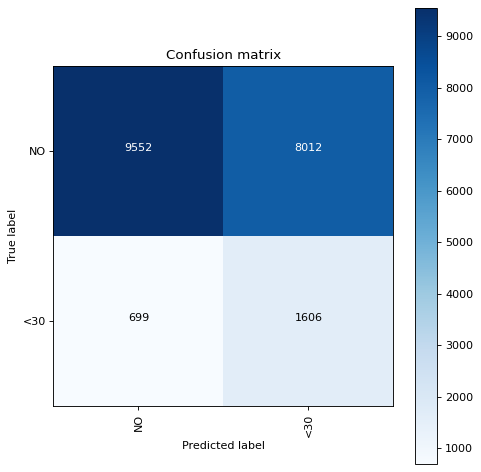

In [632]:
plot_confusion_matrix(y_test,rf_select_15_down_test_preds,threshold_rf_select_15_down)

### 1.3 Red neuronal


Creación y entrenamiento del modelo


In [635]:
rn_select_15_down_pred,rn_select_15_down_pred_train,modelo_select_15_down,history_select_15_down=ejecutarRedNeuronal(X_train_select_15_down_rn, y_train_select_15_down_rn, X_val[vals_15], y_val,X_test[vals_15],batch_size=10,epoch=4,title="Rd_con_seleccion de caracteristicas")

entrenar modelo
Epoch 1/4
1448/1448 [==============================] - 13s 8ms/step - loss: 0.6850 - accuracy: 0.5600 - precision_17: 0.5591 - val_loss: 0.6590 - val_accuracy: 0.6419 - val_precision_17: 0.1649
Epoch 2/4
1448/1448 [==============================] - 12s 8ms/step - loss: 0.6711 - accuracy: 0.5947 - precision_17: 0.6035 - val_loss: 0.6140 - val_accuracy: 0.7105 - val_precision_17: 0.1785
Epoch 3/4
1448/1448 [==============================] - 12s 8ms/step - loss: 0.6668 - accuracy: 0.5979 - precision_17: 0.5979 - val_loss: 0.6859 - val_accuracy: 0.5906 - val_precision_17: 0.1648
Epoch 4/4
1448/1448 [==============================] - 13s 9ms/step - loss: 0.6664 - accuracy: 0.6043 - precision_17: 0.6081 - val_loss: 0.6515 - val_accuracy: 0.6653 - val_precision_17: 0.1731


visualizar conportamiento durante el entrenamiento

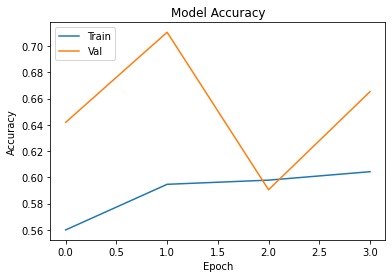

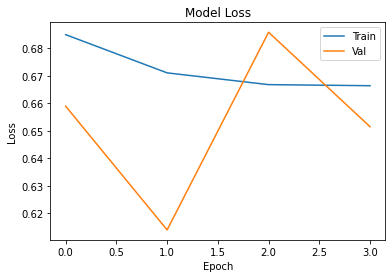

In [636]:
#visualizar accuracy y loss en el entrenamiento
plot_acc(history_select_15_down)
plot_loss(history_select_15_down)

Evaluar model: metricas y matriz de confusion

In [673]:
threshold_rn_select_15_down=0.48

print("resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:")
rn_train_select_15_down=evaluarModelo(y_train_select_15_down_rn,rn_select_15_down_pred_train, threshold_rn_select_15_down, "RN_train_15_down")
rn_test_select_15_down=evaluarModelo(y_test,rn_select_15_down_pred, threshold_rn_select_15_down, "RN_Test_15_down")
rn_train_select_15_down.join(rn_test_select_15_down)

resultados del entrenamiento de la red neuronal con seleccion de 20 caracteristicas categoricas:


,RN_train_15_down,RN_Test_15_down
AUC,0.612032,0.611197
exactitud,0.612032,0.584478
precision,0.604108,0.166760
Recall/sensibilidad,0.650090,0.645987
especifidad,0.650090,0.645987
f1,0.626256,0.265088


Confusion matrix, without normalization
[[10124  7440]
 [  816  1489]]


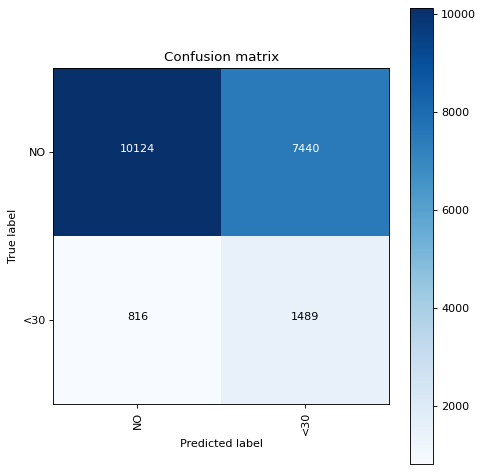

In [648]:
plot_confusion_matrix(y_test,rn_select_15_down_pred,threshold_rn_select_15_down)

### 1.4 Conbinacion de todos los modelos

In [674]:
threshold_ensemble_15=0.49
lists_of_lists=[rn_select_15_down_pred*0.5/threshold_rn_select_15_down,  rf_select_15_down_test_preds*0.5/threshold_rf_select_15_down, arbol_select_15_down_test_preds*0.5/threshold_tree_select_15_down]
result_select_15_down=np.array([sum(x)/len(lists_of_lists) for x in zip(*lists_of_lists)])
ensemble_test_select_15_down=evaluarModelo(y_test,result_select_15_down, threshold_ensemble_15, "ensemble_Test_15_down")
ensemble_test_select_15_down

,ensemble_Test_15_down
AUC,0.600439
exactitud,0.547134
precision,0.157857
Recall/sensibilidad,0.669848
especifidad,0.669848
f1,0.255502


Confusion matrix, without normalization
[[9327 8237]
 [ 761 1544]]


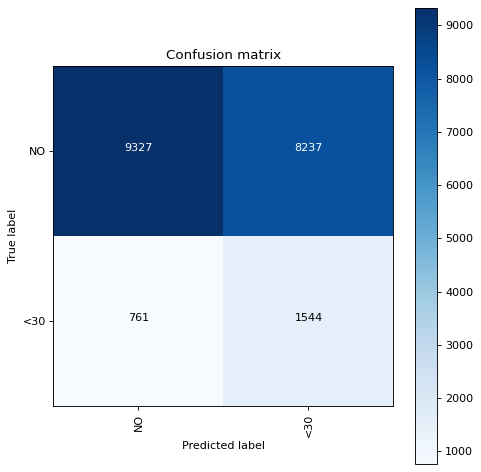

In [655]:
plot_confusion_matrix(y_test,result_select_15_down,threshold_ensemble_15)

### 1.5 Comparacion de los modelos

In [657]:
df_result_select_15=arbol_train_select_15
all_df=[ rf_train_select_15, rn_train_select_15, arbol_test_select_15, rf_test_select_15, rn_test_select_15,ensemble_test_select_15]

for next_df in all_df:
 df_result_select_15=df_result_select_15.join(next_df) 

df_result_select_15

,arbol_train_15,RF_train_15,RN_train_15,arbol_Test_15,RF_Test_15,RN_Test_15,ensemble_Test_15
AUC,0.735945,0.743395,0.663324,0.577440,0.613151,0.609201,0.609160
exactitud,0.735945,0.743395,0.663324,0.538125,0.556948,0.565957,0.586542
precision,0.670705,0.677720,0.634285,0.148311,0.163734,0.163417,0.166253
Recall/sensibilidad,0.927032,0.928168,0.771447,0.628633,0.686334,0.665510,0.638612
especifidad,0.927032,0.928168,0.771447,0.628633,0.686334,0.665510,0.638612
f1,0.778307,0.783414,0.696174,0.240000,0.264394,0.262402,0.263823


# Resultados de los modelos

## 1.Analisis de las tecnicas de balanceo

###1.1 arboles de decision

In [716]:
df_result_select=arbol_test_sb
all_df=[arbol_test_smote,arbol_test_down,arbol_test_downover]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,arbol_Test_sb,arbol_Test_smote,arbol_Test_down,arbol_Test_downover
AUC,0.591237,0.585036,0.587018,0.584937
exactitud,0.638482,0.574211,0.634355,0.565705
precision,0.166803,0.154873,0.164048,0.153897
Recall/sensibilidad,0.529718,0.599132,0.525380,0.609978
especifidad,0.529718,0.599132,0.525380,0.609978
f1,0.253714,0.246124,0.250026,0.245783


### 1.2 Random forest

In [713]:
df_result_select=rf_test_sb
all_df=[rf_test_smote,rf_test_down,rf_test_downover]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,RF_Test_sb,RF_Test_smote,RF_Test_down,RF_Test_downover
AUC,0.604154,0.609427,0.620846,0.615325
exactitud,0.595350,0.604006,0.591877,0.601439
precision,0.165520,0.169066,0.171719,0.171080
Recall/sensibilidad,0.615618,0.616486,0.658568,0.633406
especifidad,0.615618,0.616486,0.658568,0.633406
f1,0.260894,0.265359,0.272409,0.269398


### 1.3Redes neuronales

In [714]:
df_result_select=rn_test_sb
all_df=[ rn_test_smote,rn_test_down,rn_test_downover]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,RN_Test_sb,RN_Test_smote,RN_Test_down,RN_Test_downover
AUC,0.615284,0.569322,0.612957,0.582207
exactitud,0.629020,0.546429,0.643565,0.568876
precision,0.176087,0.145844,0.178056,0.153130
Recall/sensibilidad,0.597397,0.599132,0.573102,0.599566
especifidad,0.597397,0.599132,0.573102,0.599566
f1,0.272000,0.234585,0.271699,0.243954


## 2. Analisis de los resultados de la seleccion de datos

###2.1 Balanceando los datos con SMOTE+Random under sampling

In [ ]:
df_result_select=arbol_test_select_10
all_df=[arbol_test_select_15,arbol_test_select_20,rf_test_select_10,rf_test_select_15,rf_test_select_20,rn_test_select_10,rn_test_select_15,rn_test_select_20,ensemble_test_select_10,ensemble_test_select_15,ensemble_test_select_20]

for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 

df_result_select

,arbol_Test_10,arbol_Test_15,arbol_Test_20,RF_Test_10,RF_Test_15,RF_Test_20,RN_Test_10,RN_Test_15,RN_Test_20,ensemble_Test_10,ensemble_Test_15,ensemble_Test_20
AUC,0.571111,0.598843,0.578472,0.614584,0.621893,0.613036,0.606761,0.604476,0.609413,0.602627,0.614290,0.608810
exactitud,0.472294,0.681917,0.515627,0.657104,0.627712,0.594393,0.490010,0.657557,0.662288,0.559666,0.682571,0.631235
precision,0.141417,0.180182,0.146869,0.181908,0.178698,0.169006,0.154423,0.177121,0.180658,0.160127,0.188512,0.173642
Recall/sensibilidad,0.699783,0.490672,0.660304,0.559219,0.614317,0.637310,0.758785,0.535358,0.540564,0.658568,0.525380,0.579610
especifidad,0.699783,0.490672,0.660304,0.559219,0.614317,0.637310,0.758785,0.535358,0.540564,0.658568,0.525380,0.579610
f1,0.235286,0.263575,0.240290,0.274518,0.276860,0.267164,0.256621,0.266178,0.270811,0.257616,0.277466,0.267227


Arboles de decision

In [720]:
df_result_select=arbol_test_downover
all_df=[arbol_test_select_10,arbol_test_select_15,arbol_test_select_20]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,arbol_Test_downover,arbol_Test_10,arbol_Test_15,arbol_Test_20
AUC,0.584937,0.582022,0.577440,0.581561
exactitud,0.565705,0.560219,0.538125,0.586391
precision,0.153897,0.152157,0.148311,0.154816
Recall/sensibilidad,0.609978,0.610412,0.628633,0.575271
especifidad,0.609978,0.610412,0.628633,0.575271
f1,0.245783,0.243594,0.240000,0.243974


Random forest

In [722]:
df_result_select=rf_test_downover
all_df=[rf_test_select_10,rf_test_select_15,rf_test_select_20]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,RF_Test_downover,RF_Test_10,RF_Test_15,RF_Test_20
AUC,0.615325,0.614018,0.613151,0.616597
exactitud,0.601439,0.571141,0.556948,0.582364
precision,0.171080,0.165950,0.163734,0.168565
Recall/sensibilidad,0.633406,0.669848,0.686334,0.661171
especifidad,0.633406,0.669848,0.686334,0.661171
f1,0.269398,0.266001,0.264394,0.268641


Redes neuronales

In [723]:
df_result_select=rn_test_downover
all_df=[rn_test_select_10,rn_test_select_15,rn_test_select_20]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,RN_Test_downover,RN_Test_10,RN_Test_15,RN_Test_20
AUC,0.582207,0.618451,0.609201,0.614120
exactitud,0.568876,0.593638,0.565957,0.584982
precision,0.153130,0.171057,0.163417,0.167989
Recall/sensibilidad,0.599566,0.650759,0.665510,0.652061
especifidad,0.599566,0.650759,0.665510,0.652061
f1,0.243954,0.270905,0.262402,0.267153


Ensembles

In [724]:
df_result_select=ensemble_test_select_10
all_df=[ensemble_test_select_15,ensemble_test_select_20]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,ensemble_Test_10,ensemble_Test_15,ensemble_Test_20
AUC,0.611841,0.609160,0.612539
exactitud,0.611606,0.586542,0.597514
precision,0.171363,0.166253,0.169300
Recall/sensibilidad,0.612148,0.638612,0.632104
especifidad,0.612148,0.638612,0.632104
f1,0.267767,0.263823,0.267070


###2.2 Balanceando los datos con Random under sampling

In [726]:
df_result_select=arbol_test_select_10_down
all_df=[arbol_test_select_15_down,arbol_test_select_20_down,rf_test_select_10_down,rf_test_select_15_down,rf_test_select_20_down,rn_test_select_10_down,rn_test_select_15_down,rn_test_select_20_down,ensemble_test_select_10_down,ensemble_test_select_15_down,ensemble_test_select_20_down]

for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 

df_result_select

,arbol_Test_10_down,arbol_Test_15_down,arbol_Test_20_down,RF_Test_10_down,RF_Test_15_down,RF_Test_20_down,RN_Test_10,RN_Test_15_down,RN_Test_20_down,ensemble_Test_10,ensemble_Test_15_down,ensemble_Test_20_down
AUC,0.589094,0.588540,0.595831,0.621748,0.620293,0.620775,0.610879,0.611197,0.613930,0.607860,0.600439,0.610003
exactitud,0.609039,0.559414,0.589964,0.588807,0.561578,0.583421,0.606573,0.584478,0.598973,0.581912,0.547134,0.587699
precision,0.161062,0.154654,0.161294,0.171576,0.166979,0.170347,0.170098,0.166760,0.170104,0.165067,0.157857,0.166761
Recall/sensibilidad,0.563124,0.626464,0.603471,0.664642,0.696746,0.669414,0.616486,0.645987,0.633406,0.641649,0.669848,0.639046
especifidad,0.563124,0.626464,0.603471,0.664642,0.696746,0.669414,0.616486,0.645987,0.633406,0.641649,0.669848,0.639046
f1,0.250482,0.248067,0.254552,0.272743,0.269395,0.271583,0.266629,0.265088,0.268185,0.262583,0.255502,0.264500


Arboles de decision

In [730]:
df_result_select=arbol_test_down
all_df=[arbol_test_select_10_down,arbol_test_select_15_down,arbol_test_select_20_down]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,arbol_Test_down,arbol_Test_10_down,arbol_Test_15_down,arbol_Test_20_down
AUC,0.587018,0.589094,0.588540,0.595831
exactitud,0.634355,0.609039,0.559414,0.589964
precision,0.164048,0.161062,0.154654,0.161294
Recall/sensibilidad,0.525380,0.563124,0.626464,0.603471
especifidad,0.525380,0.563124,0.626464,0.603471
f1,0.250026,0.250482,0.248067,0.254552


Random forest

In [729]:
df_result_select=arbol_test_down
all_df=[rf_test_select_10_down,rf_test_select_15_down,rf_test_select_20_down]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,arbol_Test_down,RF_Test_10_down,RF_Test_15_down,RF_Test_20_down
AUC,0.587018,0.621748,0.620293,0.620775
exactitud,0.634355,0.588807,0.561578,0.583421
precision,0.164048,0.171576,0.166979,0.170347
Recall/sensibilidad,0.525380,0.664642,0.696746,0.669414
especifidad,0.525380,0.664642,0.696746,0.669414
f1,0.250026,0.272743,0.269395,0.271583


Redes neuronales

In [733]:
df_result_select=rn_test_down
all_df=[rn_test_select_10_down,rn_test_select_15_down,rn_test_select_20_down]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,RN_Test_down,RN_Test_10_down,RN_Test_15_down,RN_Test_20_down
AUC,0.612957,0.610879,0.611197,0.613930
exactitud,0.643565,0.606573,0.584478,0.598973
precision,0.178056,0.170098,0.166760,0.170104
Recall/sensibilidad,0.573102,0.616486,0.645987,0.633406
especifidad,0.573102,0.616486,0.645987,0.633406
f1,0.271699,0.266629,0.265088,0.268185


Ensembles

In [734]:
df_result_select=ensemble_test_select_10_down
all_df=[ensemble_test_select_15_down,ensemble_test_select_20_down]
for next_df in all_df:
 df_result_select=df_result_select.join(next_df) 
df_result_select

,ensemble_Test_10,ensemble_Test_15_down,ensemble_Test_20_down
AUC,0.607860,0.600439,0.610003
exactitud,0.581912,0.547134,0.587699
precision,0.165067,0.157857,0.166761
Recall/sensibilidad,0.641649,0.669848,0.639046
especifidad,0.641649,0.669848,0.639046
f1,0.262583,0.255502,0.264500


#Guardar modelos y dataframes

Funcion para guardar los modelos de arboles de decision y de random forest

In [687]:
import pickle
def save_model(path,name,model):
  with open(path+name+'.pkl','wb') as f:
    pickle.dump(model,f)

In [693]:
def save_rn(path,name,model):
  model.save(path+name+'.h5')

1. Guardar modelos de Random Forest

In [688]:
models_arbol=[arbol_sb,arbol_smote,arbol_down,arbol_downover,arbol_select_10_down,arbol_select_15_down,arbol_select_20_down,arbol_select_10,arbol_select_15,arbol_select_20]
names_arbol=["arbol_sb","arbol_smote","arbol_down","arbol_downover","arbol_select_10_down","arbol_select_15_down","arbol_select_20_down","arbol_select_10","arbol_select_15","arbol_select_20"]
path="/content/gdrive/MyDrive/TFM/modelos/arboles/"
for i in range(0,len(models_arbol)):
  save_model(path,names_arbol[i],models_arbol[i])



In [ ]:
#leer decisiontree

2. Guardar modelos de Random Forest

In [690]:
models_rf=[rf_sb,rf_smote,rf_down,rf_downover,rf_select_10_down,rf_select_15_down,rf_select_20_down,rf_select_10,rf_select_15,rf_select_20]
names_rf=["rf_sb","rf_smote","rf_down","rf_downover","rf_select_10_down","rf_select_15_down","rf_select_20_down","rf_select_10","rf_select_15","rf_select_20"]
path="/content/gdrive/MyDrive/TFM/modelos/random_forest/"
for i in range(0,len(models_rf)):
  save_model(path,names_rf[i],models_rf[i])


3. Guardar modelos de redes neuronales

In [695]:
models_rn=[modelo_sb,modelo_smote,modelo_down,modelo_downover,modelo_select_10_down,modelo_select_15_down,modelo_select_20_down,modelo_select_10,modelo_select_15,modelo_select_20]
names_rn=["modelo_sb","modelo_smote","modelo_down","modelo_downover","modelo_select_10_down","modelo_select_15_down","modelo_select_20_down","modelo_select_10","modelo_select_15","modelo_select_20"]
path="/content/gdrive/MyDrive/TFM/modelos/redes_neuronales/"
for i in range(0,len(models_rn)):
  save_rn(path,names_rn[i],models_rn[i])




##guardar datos de entrenamiento test y validacion

In [697]:
def guardar_csv(dataf,path,name):
  dataf.to_csv(path+name+".csv")

In [ ]:
path="/content/gdrive/MyDrive/TFM/a/"

dataframes=[X_train, X_test, y_train,  y_test, X_train_rn,X_val, y_train_rn, y_val]
csv_names=["X_train", "X_test", "y_train",  "y_test", "X_train_rn","X_val", "y_train_rn", "y_val"]
for i in range(0,len(dataframes)):
  guardar_csv(dataframes[i],path,csv_names[i]) 
